In [1]:
import pandas as pd
from datetime import date
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM,Activation,RepeatVector
from feature_engine.timeseries.forecasting import LagFeatures, WindowFeatures, ExpandingWindowFeatures
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('m-hsmort7112.txt', sep=' ')

In [3]:
df.head()

year  mon    hs  mort
0  1971    4  1986  7.31
1  1971    5  2049  7.43
2  1971    6  2026  7.53
3  1971    7  2083  7.60
4  1971    8  2158  7.70

In [4]:
df['Date'] = df['year'].astype(str)+' /'+df['mon'].astype(str)

In [6]:
df_new = df[['Date', 'hs','mort']]
df_new

Date    hs  mort
0     1971 /4  1986  7.31
1     1971 /5  2049  7.43
2     1971 /6  2026  7.53
3     1971 /7  2083  7.60
4     1971 /8  2158  7.70
..        ...   ...   ...
487  2011 /11   702  3.99
488  2011 /12   681  3.96
489   2012 /1   714  3.92
490   2012 /2   694  3.89
491   2012 /3   654  3.95

[492 rows x 3 columns]

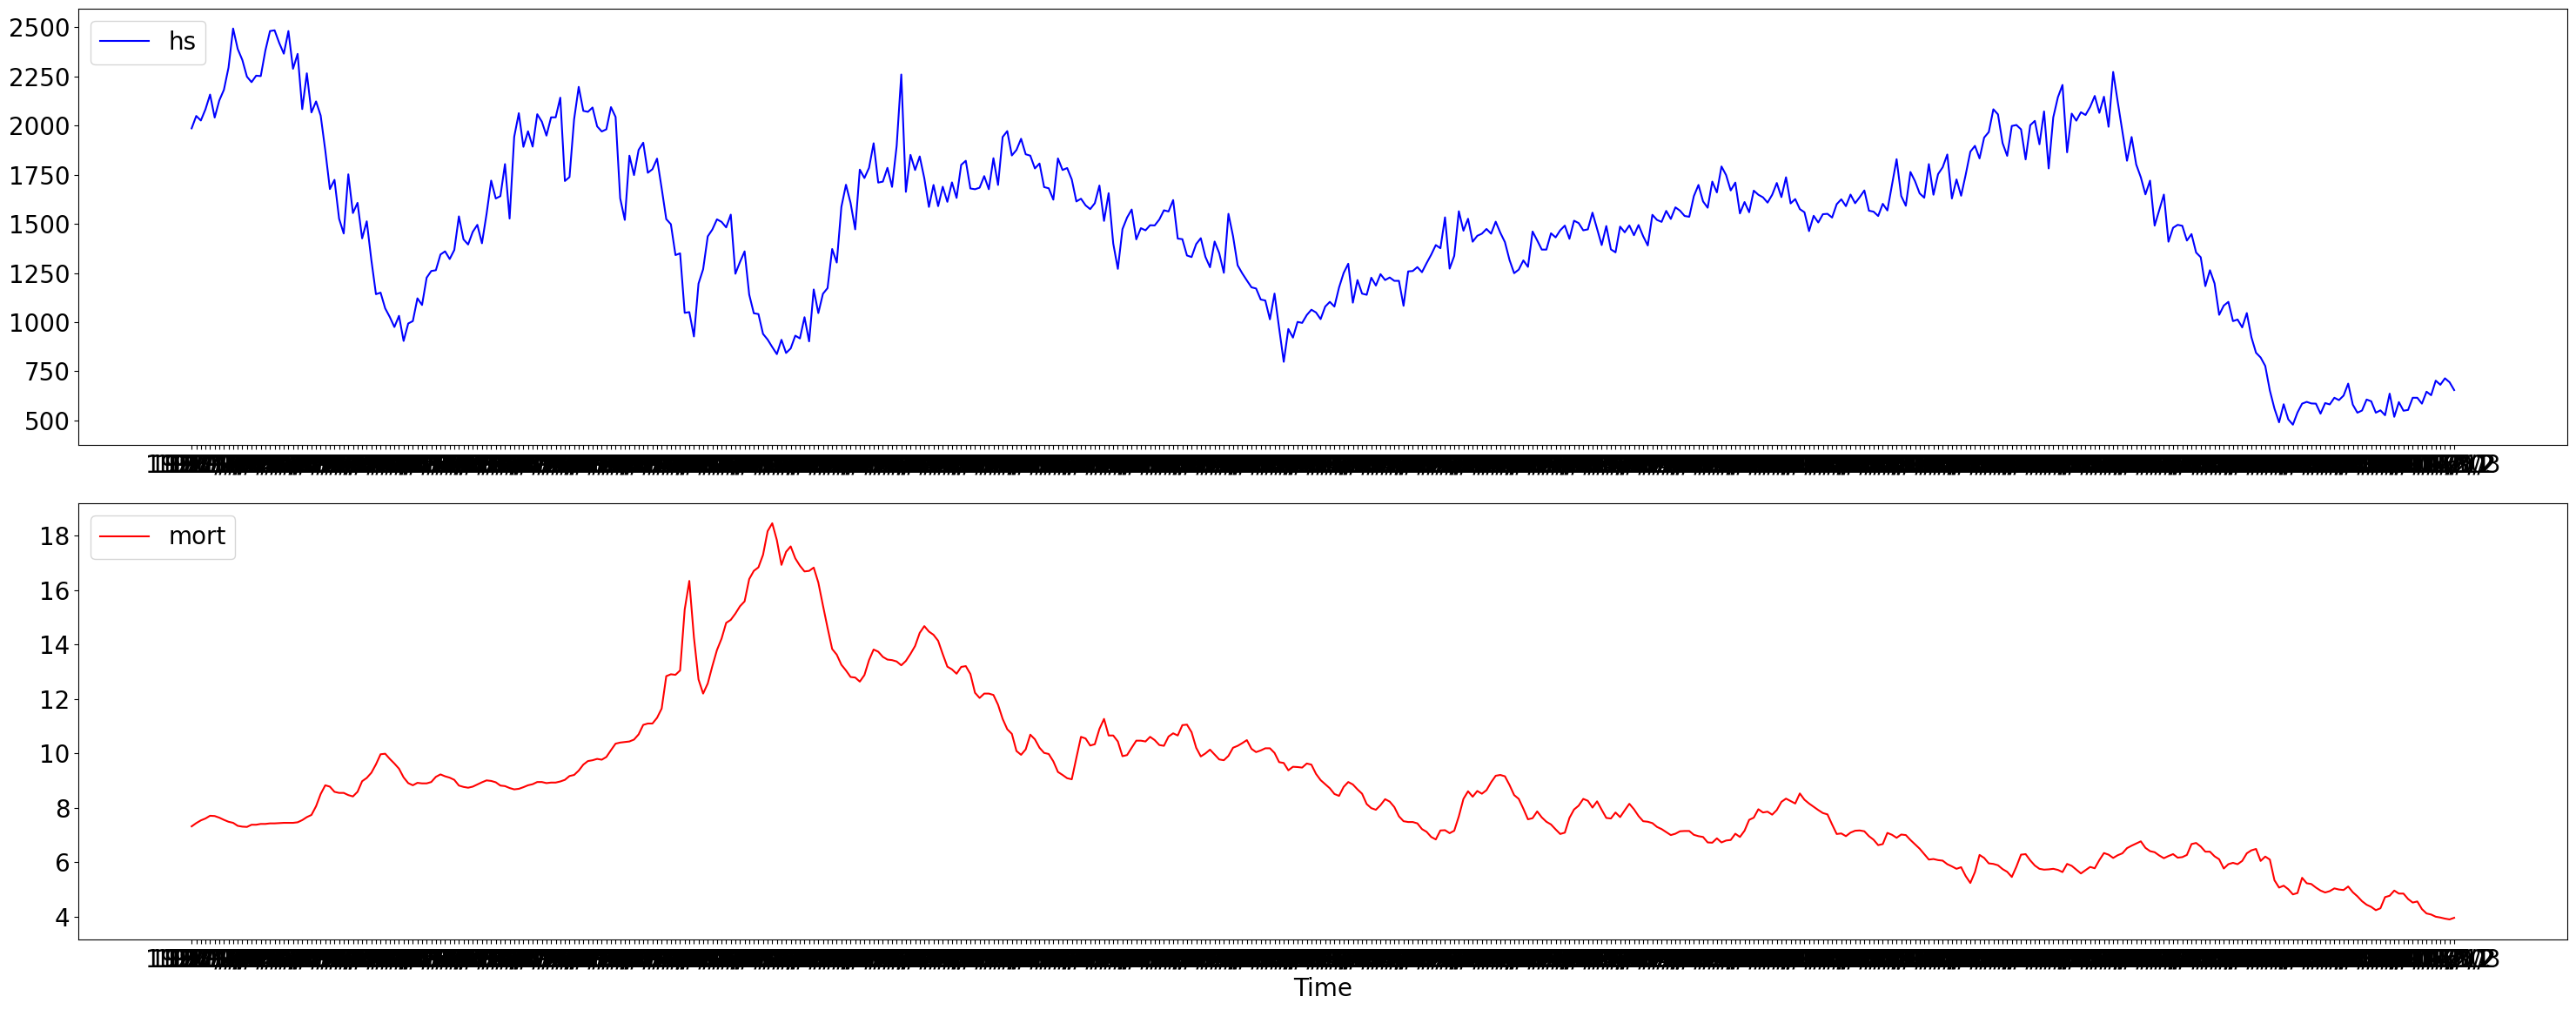

In [24]:
plt.figure(figsize=(30,12))
plt.rcParams["font.size"]="20"
plt.subplot(2,1,1)
plt.plot(df_new['Date'],df_new['hs'],label='hs',color='b')
plt.legend(loc='upper left')

plt.subplot(2,1,2)
plt.plot(df_new['Date'],df_new['mort'],label='mort',color='r')
plt.legend(loc='upper left')

plt.xlabel('Time')
plt.tight_layout()
plt.show()

In [25]:
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new['Date']

C:\Users\User\AppData\Local\Temp\ipykernel_15892\35616042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'])


0     1971-04-01
1     1971-05-01
2     1971-06-01
3     1971-07-01
4     1971-08-01
         ...    
487   2011-11-01
488   2011-12-01
489   2012-01-01
490   2012-02-01
491   2012-03-01
Name: Date, Length: 492, dtype: datetime64[ns]

In [26]:
df_ = df_new.copy()
df_

Date    hs  mort
0   1971-04-01  1986  7.31
1   1971-05-01  2049  7.43
2   1971-06-01  2026  7.53
3   1971-07-01  2083  7.60
4   1971-08-01  2158  7.70
..         ...   ...   ...
487 2011-11-01   702  3.99
488 2011-12-01   681  3.96
489 2012-01-01   714  3.92
490 2012-02-01   694  3.89
491 2012-03-01   654  3.95

[492 rows x 3 columns]

In [27]:
#Date Time Features
df_['year']  = df_['Date'].dt.year
df_['month']  = df_['Date'].dt.month

In [28]:
#Lag features
df_[f"hs_lag_1"] = df_["hs"].shift(periods=1)
df_[f"hs_lag_2"] = df_["hs"].shift(periods=2)
df_[f"hs_lag_3"] = df_["hs"].shift(periods=3)
df_[f"hs_lag_4"] = df_["hs"].shift(periods=4)
df_[f"hs_lag_5"] = df_["hs"].shift(periods=5)
df_[f"hs_lag_6"] = df_["hs"].shift(periods=6)
df_[f"hs_lag_7"] = df_["hs"].shift(periods=7)
df_[f"hs_lag_8"] = df_["hs"].shift(periods=8)
df_[f"hs_lag_12"] = df_["hs"].shift(periods=12)
df_[f"hs_lag_14"] = df_["hs"].shift(periods=14)
df_[f"hs_lag_16"] = df_["hs"].shift(periods=16)
df_[f"hs_lag_18"] = df_["hs"].shift(periods=18)
df_[f"hs_lag_20"] = df_["hs"].shift(periods=20)
df_[f"hs_lag_22"] = df_["hs"].shift(periods=22)
df_[f"hs_lag_24"] = df_["hs"].shift(periods=24)
df_[f"hs_lag_28"] = df_["hs"].shift(periods=28)
df_[f"hs_lag_30"] = df_["hs"].shift(periods=30)


In [29]:
#Lag features
df_[f"mort_lag_1"] = df_["mort"].shift(periods=1)
df_[f"mort_lag_2"] = df_["mort"].shift(periods=2)
df_[f"mort_lag_3"] = df_["mort"].shift(periods=3)
df_[f"mort_lag_4"] = df_["mort"].shift(periods=4)
df_[f"mort_lag_5"] = df_["mort"].shift(periods=5)
df_[f"mort_lag_6"] = df_["mort"].shift(periods=6)
df_[f"mort_lag_7"] = df_["mort"].shift(periods=7)
df_[f"mort_lag_8"] = df_["mort"].shift(periods=8)
df_[f"mort_lag_12"] = df_["mort"].shift(periods=12)
df_[f"mort_lag_14"] = df_["mort"].shift(periods=14)
df_[f"mort_lag_16"] = df_["mort"].shift(periods=16)
df_[f"mort_lag_18"] = df_["mort"].shift(periods=18)
df_[f"mort_lag_20"] = df_["mort"].shift(periods=20)
df_[f"mort_lag_22"] = df_["mort"].shift(periods=22)
df_[f"mort_lag_24"] = df_["mort"].shift(periods=24)
df_[f"mort_lag_28"] = df_["mort"].shift(periods=28)
df_[f"mort_lag_30"] = df_["mort"].shift(periods=30)


In [30]:
#Rolling window feature
df_['rolling_mean_hs_7'] = df_['hs'].rolling(window=7).mean()
df_['rolling_mean_hs_12'] = df_['hs'].rolling(window=12).mean()
df_['rolling_mean_hs_16'] = df_['hs'].rolling(window=16).mean()
df_['rolling_mean_hs_20'] = df_['hs'].rolling(window=20).mean()
df_['rolling_mean_hs_24'] = df_['hs'].rolling(window=24).mean()
df_['rolling_mean_hs_28'] = df_['hs'].rolling(window=28).mean()
df_['rolling_mean_hs_32'] = df_['hs'].rolling(window=32).mean()
df_['rolling_mean_hs_40'] = df_['hs'].rolling(window=40).mean()
df_['rolling_mean_hs_80'] = df_['hs'].rolling(window=80).mean()
df_['rolling_mean_hs_100'] = df_['hs'].rolling(window=100).mean()
df_['rolling_mean_hs_200'] = df_['hs'].rolling(window=200).mean()

In [31]:
df_['rolling_mean_mort_7'] = df_['mort'].rolling(window=7).mean()
df_['rolling_mean_mort_12'] = df_['mort'].rolling(window=12).mean()
df_['rolling_mean_mort_16'] = df_['mort'].rolling(window=16).mean()
df_['rolling_mean_mort_20'] = df_['mort'].rolling(window=20).mean()
df_['rolling_mean_mort_24'] = df_['mort'].rolling(window=24).mean()
df_['rolling_mean_mort_28'] = df_['mort'].rolling(window=28).mean()
df_['rolling_mean_mort_32'] = df_['mort'].rolling(window=32).mean()
df_['rolling_mean_mort_40'] = df_['mort'].rolling(window=40).mean()
df_['rolling_mean_mort_80'] = df_['mort'].rolling(window=80).mean()
df_['rolling_mean_mort_100'] = df_['mort'].rolling(window=100).mean()
df_['rolling_mean_mort_200'] = df_['mort'].rolling(window=200).mean()

In [32]:
#Expanding Window feature
df_['expanding_mean_hs_7'] = df_['hs'].expanding(7).mean()
df_['expanding_mean_hs_12'] = df_['hs'].expanding(12).mean()
df_['expanding_mean_hs_16'] = df_['hs'].expanding(16).mean()
df_['expanding_mean_hs_20'] = df_['hs'].expanding(20).mean()
df_['expanding_mean_hs_24'] = df_['hs'].expanding(24).mean()
df_['expanding_mean_hs_28'] = df_['hs'].expanding(28).mean()
df_['expanding_mean_hs_40'] = df_['hs'].expanding(40).mean()
df_['expanding_mean_hs_80'] = df_['hs'].expanding(80).mean()
df_['expanding_mean_hs_100'] = df_['hs'].expanding(100).mean()
df_['expanding_mean_hs_200'] = df_['hs'].expanding(200).mean()

In [33]:
#Expanding Window feature
df_['expanding_mean_mort_7'] = df_['mort'].expanding(7).mean()
df_['expanding_mean_mort_12'] = df_['mort'].expanding(12).mean()
df_['expanding_mean_mort_16'] = df_['mort'].expanding(16).mean()
df_['expanding_mean_mort_20'] = df_['mort'].expanding(20).mean()
df_['expanding_mean_mort_24'] = df_['mort'].expanding(24).mean()
df_['expanding_mean_mort_28'] = df_['mort'].expanding(28).mean()
df_['expanding_mean_mort_40'] = df_['mort'].expanding(40).mean()
df_['expanding_mean_mort_80'] = df_['mort'].expanding(80).mean()
df_['expanding_mean_mort_100'] = df_['mort'].expanding(100).mean()
df_['expanding_mean_mort_200'] = df_['mort'].expanding(200).mean()

In [46]:
#Remove seasonality using differencing
df_['hs_diff_1'] = df_['hs'] - df_["hs"].shift(periods=1)
df_['hs_diff_2'] = df_['hs'] - df_["hs"].shift(periods=2)
df_['hs_diff_3'] = df_['hs'] - df_["hs"].shift(periods=3)
df_['hs_diff_4'] = df_['hs'] - df_["hs"].shift(periods=4)
df_['hs_diff_7'] = df_['hs'] - df_["hs"].shift(periods=7)
df_['hs_diff_12'] = df_['hs'] - df_["hs"].shift(periods=12)


df_['mort_diff_1'] = df_['mort'] - df_["mort"].shift(periods=1)
df_['mort_diff_2'] = df_['mort'] - df_["mort"].shift(periods=2)
df_['mort_diff_3'] = df_['mort'] - df_["mort"].shift(periods=3)
df_['mort_diff_4'] = df_['mort'] - df_["mort"].shift(periods=4)
df_['mort_diff_7'] = df_['mort'] - df_["mort"].shift(periods=7)
df_['mort_diff_12'] = df_['mort'] - df_["mort"].shift(periods=12)

In [47]:
df_

Date    hs  mort  year  month  hs_lag_1  hs_lag_2  hs_lag_3  \
0   1971-04-01  1986  7.31  1971      4       NaN       NaN       NaN   
1   1971-05-01  2049  7.43  1971      5    1986.0       NaN       NaN   
2   1971-06-01  2026  7.53  1971      6    2049.0    1986.0       NaN   
3   1971-07-01  2083  7.60  1971      7    2026.0    2049.0    1986.0   
4   1971-08-01  2158  7.70  1971      8    2083.0    2026.0    2049.0   
..         ...   ...   ...   ...    ...       ...       ...       ...   
487 2011-11-01   702  3.99  2011     11     628.0     646.0     585.0   
488 2011-12-01   681  3.96  2011     12     702.0     628.0     646.0   
489 2012-01-01   714  3.92  2012      1     681.0     702.0     628.0   
490 2012-02-01   694  3.89  2012      2     714.0     681.0     702.0   
491 2012-03-01   654  3.95  2012      3     694.0     714.0     681.0   

     hs_lag_4  hs_lag_5  ...  hs_diff_3  hs_diff_4  hs_diff_7  hs_diff_12  \
0         NaN       NaN  ...        NaN        NaN        NaN         NaN   
1         NaN       NaN  ...        NaN        NaN        NaN         NaN   
2         NaN       NaN  ...        NaN        NaN        NaN         NaN   
3         NaN       NaN  ...       97.0        NaN        NaN         NaN   
4      1986.0       NaN  ...      109.0      172.0        NaN         NaN   
..        ...       ...  ...        ...        ...        ...         ...   
487     615.0     615.0  ...      117.0       87.0      153.0       151.0   
488     585.0     615.0  ...       35.0       96.0      128.0       155.0   
489     646.0     585.0  ...       86.0       68.0       99.0        78.0   
490     628.0     646.0  ...       -8.0       66.0       79.0       176.0   
491     702.0     628.0  ...      -27.0      -48.0       69.0        61.0   

     mort_diff_1  mort_diff_2  mort_diff_3  mort_diff_4  mort_diff_7  \
0            NaN          NaN          NaN          NaN          NaN   
1           0.12          NaN          NaN          NaN          NaN   
2           0.10         0.22          NaN          NaN          NaN   
3           0.07         0.17         0.29          NaN          NaN   
4           0.10         0.17         0.27         0.39          NaN   
..           ...          ...          ...          ...          ...   
487        -0.08        -0.12        -0.28        -0.56        -0.85   
488        -0.03        -0.11        -0.15        -0.31        -0.68   
489        -0.04        -0.07        -0.15        -0.19        -0.59   
490        -0.03        -0.07        -0.10        -0.18        -0.66   
491         0.06         0.03        -0.01        -0.04        -0.32   

     mort_diff_12  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
..            ...  
487         -0.31  
488         -0.75  
489         -0.84  
490         -1.06  
491         -0.89  

[492 rows x 93 columns]

In [48]:
df = df_.fillna(0)

# Random Forest

In [49]:
#Splitting data into x,y
y =df["hs"]
X =df.drop(["Date","hs","mort"],axis=1)

In [50]:
X

year  month  hs_lag_1  hs_lag_2  hs_lag_3  hs_lag_4  hs_lag_5  hs_lag_6  \
0    1971      4       0.0       0.0       0.0       0.0       0.0       0.0   
1    1971      5    1986.0       0.0       0.0       0.0       0.0       0.0   
2    1971      6    2049.0    1986.0       0.0       0.0       0.0       0.0   
3    1971      7    2026.0    2049.0    1986.0       0.0       0.0       0.0   
4    1971      8    2083.0    2026.0    2049.0    1986.0       0.0       0.0   
..    ...    ...       ...       ...       ...       ...       ...       ...   
487  2011     11     628.0     646.0     585.0     615.0     615.0     553.0   
488  2011     12     702.0     628.0     646.0     585.0     615.0     615.0   
489  2012      1     681.0     702.0     628.0     646.0     585.0     615.0   
490  2012      2     714.0     681.0     702.0     628.0     646.0     585.0   
491  2012      3     694.0     714.0     681.0     702.0     628.0     646.0   

     hs_lag_7  hs_lag_8  ...  hs_diff_3  hs_diff_4  hs_diff_7  hs_diff_12  \
0         0.0       0.0  ...        0.0        0.0        0.0         0.0   
1         0.0       0.0  ...        0.0        0.0        0.0         0.0   
2         0.0       0.0  ...        0.0        0.0        0.0         0.0   
3         0.0       0.0  ...       97.0        0.0        0.0         0.0   
4         0.0       0.0  ...      109.0      172.0        0.0         0.0   
..        ...       ...  ...        ...        ...        ...         ...   
487     549.0     593.0  ...      117.0       87.0      153.0       151.0   
488     553.0     549.0  ...       35.0       96.0      128.0       155.0   
489     615.0     553.0  ...       86.0       68.0       99.0        78.0   
490     615.0     615.0  ...       -8.0       66.0       79.0       176.0   
491     585.0     615.0  ...      -27.0      -48.0       69.0        61.0   

     mort_diff_1  mort_diff_2  mort_diff_3  mort_diff_4  mort_diff_7  \
0           0.00         0.00         0.00         0.00         0.00   
1           0.12         0.00         0.00         0.00         0.00   
2           0.10         0.22         0.00         0.00         0.00   
3           0.07         0.17         0.29         0.00         0.00   
4           0.10         0.17         0.27         0.39         0.00   
..           ...          ...          ...          ...          ...   
487        -0.08        -0.12        -0.28        -0.56        -0.85   
488        -0.03        -0.11        -0.15        -0.31        -0.68   
489        -0.04        -0.07        -0.15        -0.19        -0.59   
490        -0.03        -0.07        -0.10        -0.18        -0.66   
491         0.06         0.03        -0.01        -0.04        -0.32   

     mort_diff_12  
0            0.00  
1            0.00  
2            0.00  
3            0.00  
4            0.00  
..            ...  
487         -0.31  
488         -0.75  
489         -0.84  
490         -1.06  
491         -0.89  

[492 rows x 90 columns]

In [51]:
train_size = int(len(X)*0.8)
test_size_x = len(X) - train_size
train_data_x = X[:train_size]
test_data_x =  X[train_size:]

In [52]:
train_size = int(len(y)*0.8)
test_size_y = len(y) - train_size
train_data_y = y[:train_size]
test_data_y =  y[train_size:]

In [53]:
train_data_x

year  month  hs_lag_1  hs_lag_2  hs_lag_3  hs_lag_4  hs_lag_5  hs_lag_6  \
0    1971      4       0.0       0.0       0.0       0.0       0.0       0.0   
1    1971      5    1986.0       0.0       0.0       0.0       0.0       0.0   
2    1971      6    2049.0    1986.0       0.0       0.0       0.0       0.0   
3    1971      7    2026.0    2049.0    1986.0       0.0       0.0       0.0   
4    1971      8    2083.0    2026.0    2049.0    1986.0       0.0       0.0   
..    ...    ...       ...       ...       ...       ...       ...       ...   
388  2003      8    1897.0    1867.0    1751.0    1643.0    1726.0    1629.0   
389  2003      9    1833.0    1897.0    1867.0    1751.0    1643.0    1726.0   
390  2003     10    1939.0    1833.0    1897.0    1867.0    1751.0    1643.0   
391  2003     11    1967.0    1939.0    1833.0    1897.0    1867.0    1751.0   
392  2003     12    2083.0    1967.0    1939.0    1833.0    1897.0    1867.0   

     hs_lag_7  hs_lag_8  ...  hs_diff_3  hs_diff_4  hs_diff_7  hs_diff_12  \
0         0.0       0.0  ...        0.0        0.0        0.0         0.0   
1         0.0       0.0  ...        0.0        0.0        0.0         0.0   
2         0.0       0.0  ...        0.0        0.0        0.0         0.0   
3         0.0       0.0  ...       97.0        0.0        0.0         0.0   
4         0.0       0.0  ...      109.0      172.0        0.0         0.0   
..        ...       ...  ...        ...        ...        ...         ...   
388    1853.0    1788.0  ...       82.0      190.0      -20.0       200.0   
389    1629.0    1853.0  ...       72.0      188.0      310.0       135.0   
390    1726.0    1629.0  ...       70.0      100.0      241.0       319.0   
391    1643.0    1726.0  ...      250.0      186.0      440.0       330.0   
392    1751.0    1643.0  ...      118.0      224.0      306.0       269.0   

     mort_diff_1  mort_diff_2  mort_diff_3  mort_diff_4  mort_diff_7  \
0           0.00         0.00         0.00         0.00         0.00   
1           0.12         0.00         0.00         0.00         0.00   
2           0.10         0.22         0.00         0.00         0.00   
3           0.07         0.17         0.29         0.00         0.00   
4           0.10         0.17         0.27         0.39         0.00   
..           ...          ...          ...          ...          ...   
388         0.63         1.03         0.78         0.45         0.34   
389        -0.11         0.52         0.92         0.67         0.31   
390        -0.20        -0.31         0.32         0.72         0.20   
391        -0.02        -0.22        -0.33         0.30         0.12   
392        -0.05        -0.07        -0.27        -0.38         0.40   

     mort_diff_12  
0            0.00  
1            0.00  
2            0.00  
3            0.00  
4            0.00  
..            ...  
388         -0.03  
389          0.06  
390         -0.16  
391         -0.14  
392         -0.17  

[393 rows x 90 columns]

In [54]:
model_rf = RandomForestClassifier()

In [55]:
#fit the model
model_rf.fit(train_data_x,train_data_y)

#calculate the accueacy of the classifier
y_pred = model_rf.predict(test_data_x)
accuracy =accuracy_score(test_data_y,y_pred)
print(accuracy)

0.0


In [56]:
model_rf.feature_importances_

array([0.00520161, 0.00917663, 0.01505218, 0.01417406, 0.01236625,
       0.0137911 , 0.01278084, 0.0140364 , 0.01049856, 0.01084944,
       0.01156411, 0.01081531, 0.01262401, 0.0118302 , 0.0108832 ,
       0.01129702, 0.01215735, 0.01259874, 0.01137682, 0.01441368,
       0.01219372, 0.01231521, 0.01104979, 0.01113125, 0.01205628,
       0.01091621, 0.01260131, 0.01267637, 0.01389088, 0.01169981,
       0.01059326, 0.01257456, 0.01188678, 0.01295387, 0.01159655,
       0.01162859, 0.01032716, 0.01046082, 0.01083989, 0.00850276,
       0.01041412, 0.0086223 , 0.00999678, 0.01002689, 0.01194726,
       0.00943917, 0.0092278 , 0.01090709, 0.01015784, 0.01059381,
       0.00990321, 0.00943731, 0.00995523, 0.00884838, 0.00887062,
       0.00869357, 0.00962997, 0.00929325, 0.01275019, 0.01234736,
       0.0096181 , 0.00963086, 0.00810528, 0.01022413, 0.00941488,
       0.00945564, 0.00829703, 0.00909655, 0.0097232 , 0.0085756 ,
       0.00840776, 0.00948728, 0.00908366, 0.00964262, 0.00900

In [57]:
model_rf.feature_names_in_


array(['year', 'month', 'hs_lag_1', 'hs_lag_2', 'hs_lag_3', 'hs_lag_4',
       'hs_lag_5', 'hs_lag_6', 'hs_lag_7', 'hs_lag_8', 'hs_lag_12',
       'hs_lag_14', 'hs_lag_16', 'hs_lag_18', 'hs_lag_20', 'hs_lag_22',
       'hs_lag_24', 'hs_lag_28', 'hs_lag_30', 'mort_lag_1', 'mort_lag_2',
       'mort_lag_3', 'mort_lag_4', 'mort_lag_5', 'mort_lag_6',
       'mort_lag_7', 'mort_lag_8', 'mort_lag_12', 'mort_lag_14',
       'mort_lag_16', 'mort_lag_18', 'mort_lag_20', 'mort_lag_22',
       'mort_lag_24', 'mort_lag_28', 'mort_lag_30', 'rolling_mean_hs_7',
       'rolling_mean_hs_12', 'rolling_mean_hs_16', 'rolling_mean_hs_20',
       'rolling_mean_hs_24', 'rolling_mean_hs_28', 'rolling_mean_hs_32',
       'rolling_mean_hs_40', 'rolling_mean_hs_80', 'rolling_mean_hs_100',
       'rolling_mean_hs_200', 'rolling_mean_mort_7',
       'rolling_mean_mort_12', 'rolling_mean_mort_16',
       'rolling_mean_mort_20', 'rolling_mean_mort_24',
       'rolling_mean_mort_28', 'rolling_mean_mort_32',
       '

<BarContainer object of 90 artists>

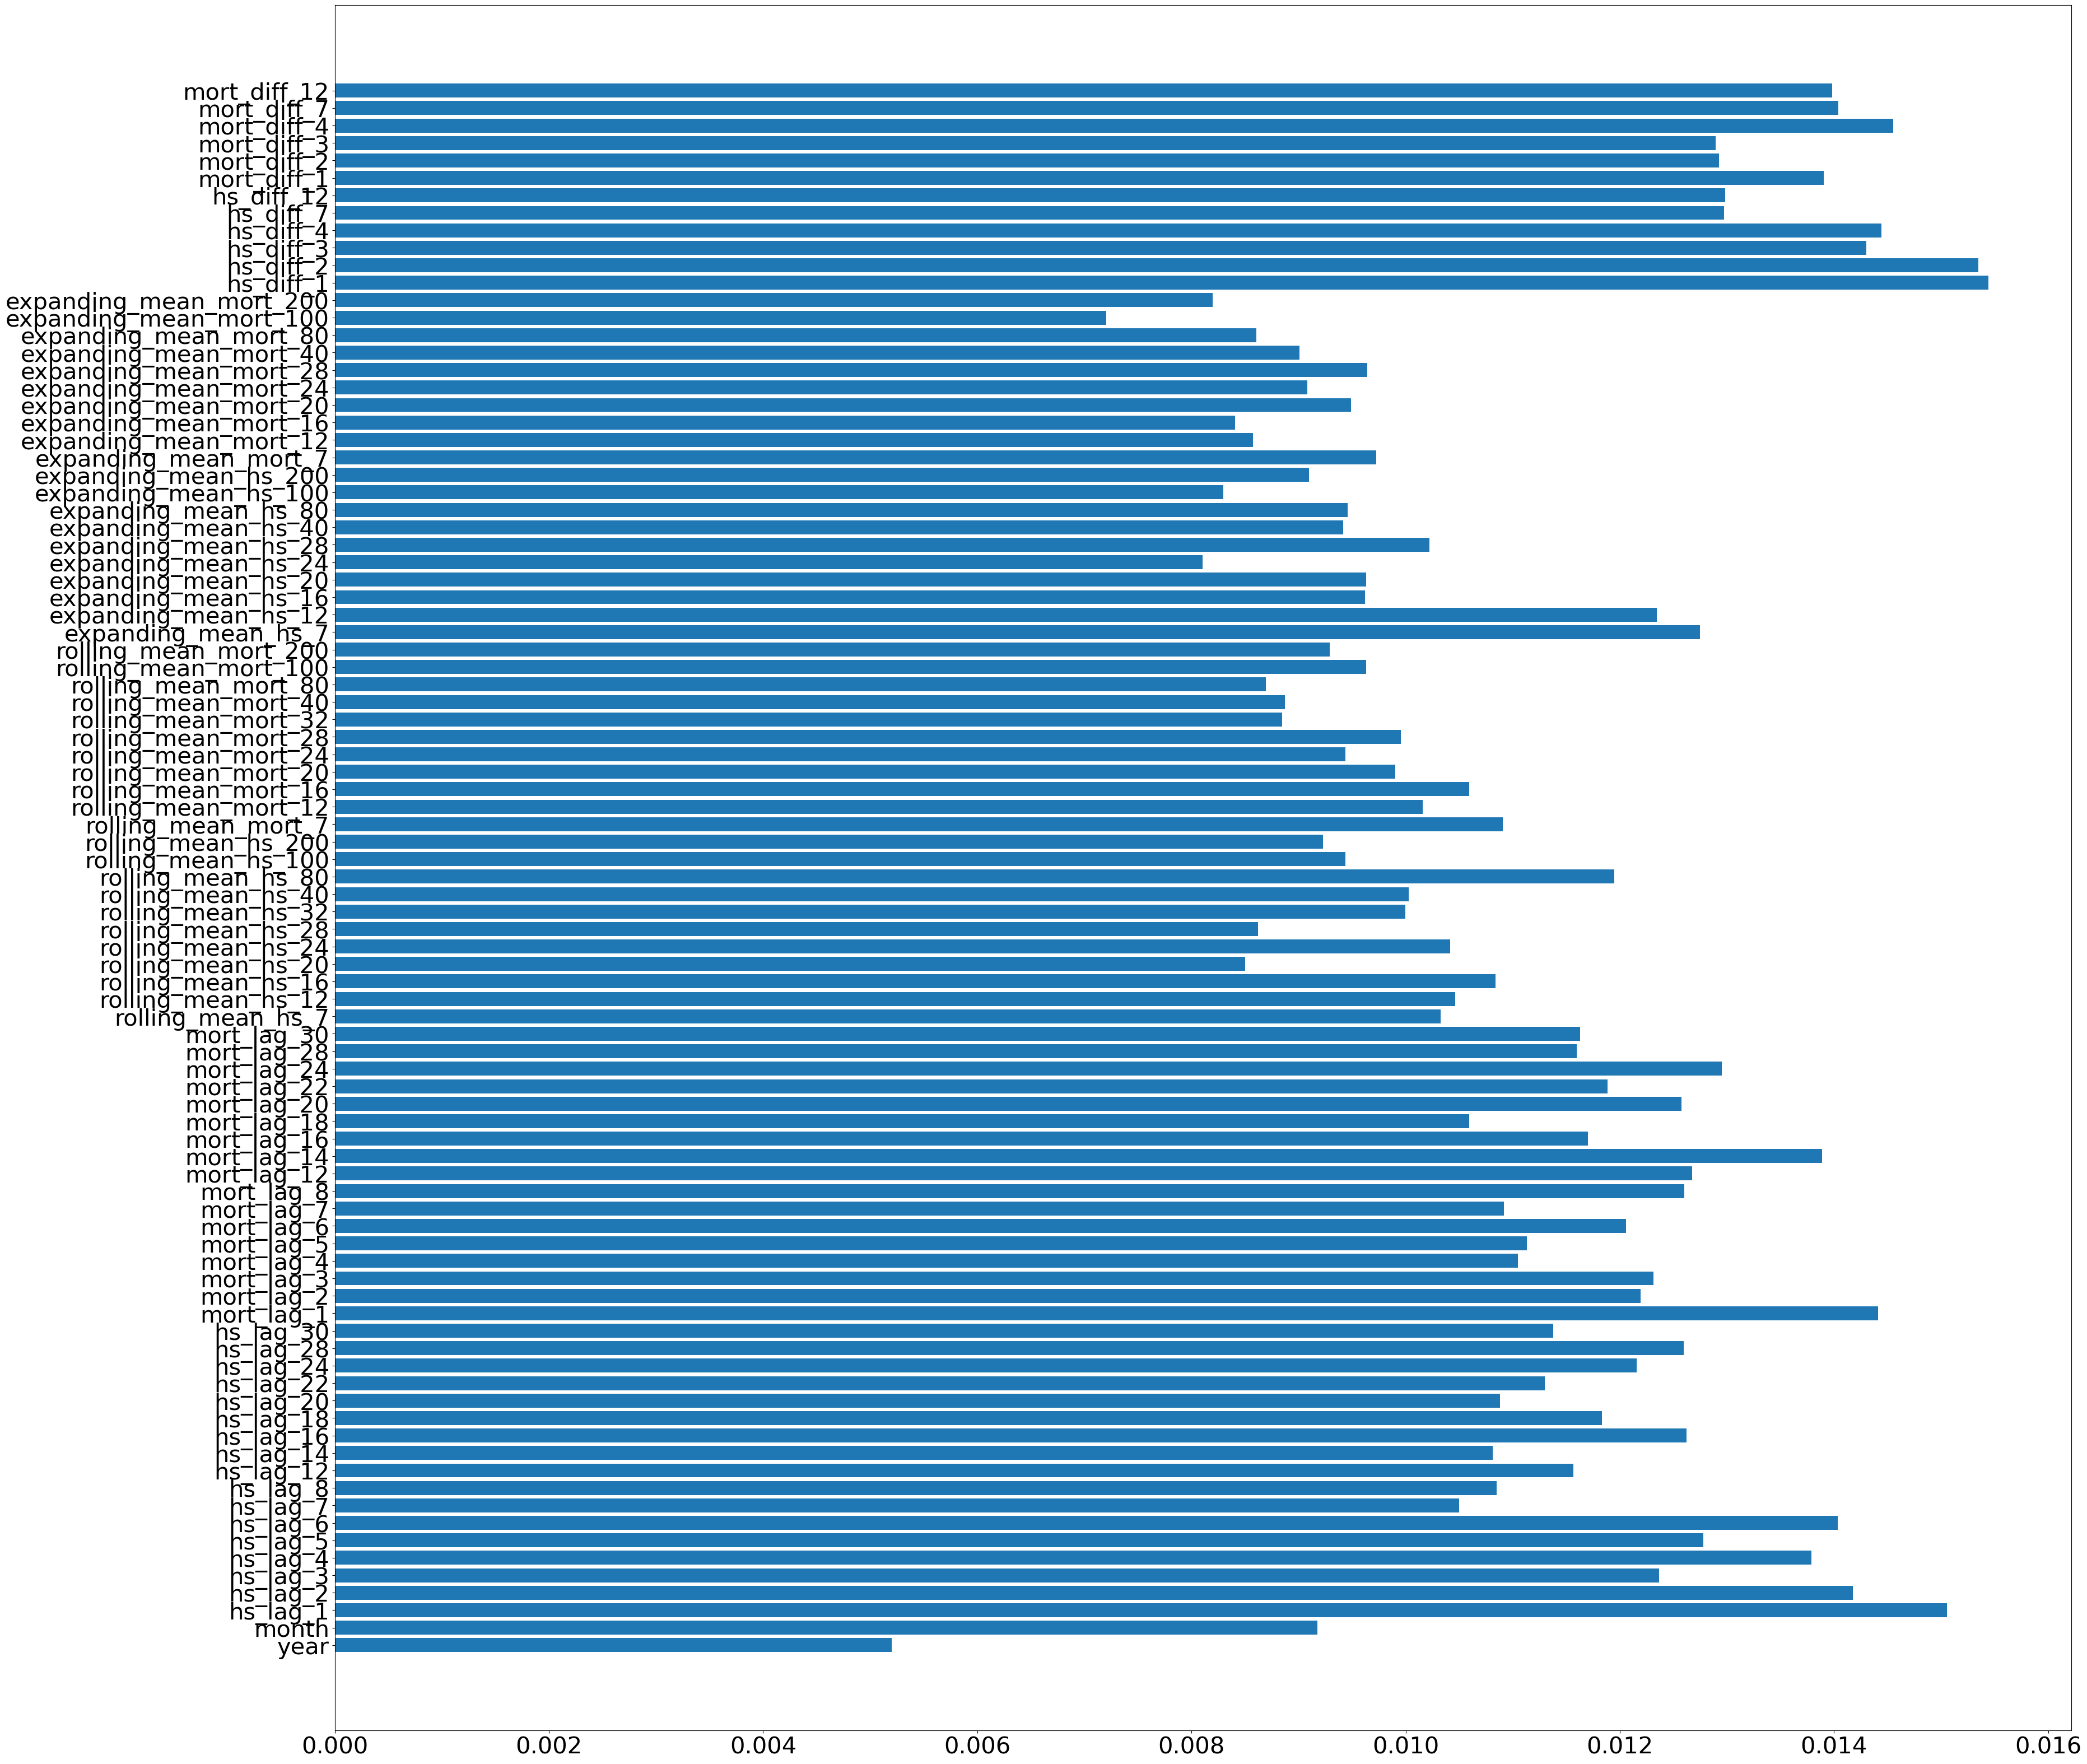

In [58]:
importances_df = pd.DataFrame({"feature_names" : model_rf.feature_names_in_, 
                               "importances" : model_rf.feature_importances_})
                             
# Plotting bar chart, g is from graph
plt.figure(figsize=(40,40))
plt.rcParams["font.size"]="30"
plt.barh(importances_df["feature_names"], 
         importances_df["importances"])
#g.set_title("Feature importances", fontsize=25);                          


# RandomForest mort data

In [59]:
#Splitting data into x,y
y_hstart = df["hs"].astype(int)

X_hstart =df.drop(["Date","hs","mort"],axis=1)

In [60]:
train_size = int(len(X_hstart)*0.8)
test_size_x = len(X_hstart) - train_size
train_data_x_hstart = X_hstart[:train_size]
test_data_x_hstart =  X_hstart[train_size:]

In [61]:
train_size = int(len(y_hstart)*0.8)
test_size_y = len(y_hstart) - train_size
train_data_y_hstart = y_hstart[:train_size]
test_data_y_hstart =  y_hstart[train_size:]
train_data_y_hstart

0      1986
1      2049
2      2026
3      2083
4      2158
       ... 
388    1833
389    1939
390    1967
391    2083
392    2057
Name: hs, Length: 393, dtype: int32

In [64]:
model_rf_mort = RandomForestClassifier()


In [65]:
model_rf_mort.fit(train_data_x_hstart,train_data_y_hstart)

#calculate the accueacy of the classifier
y_pred = model_rf.predict(test_data_x_hstart)
accuracy =accuracy_score(test_data_y_hstart,y_pred)
print(accuracy)


0.0


<BarContainer object of 90 artists>

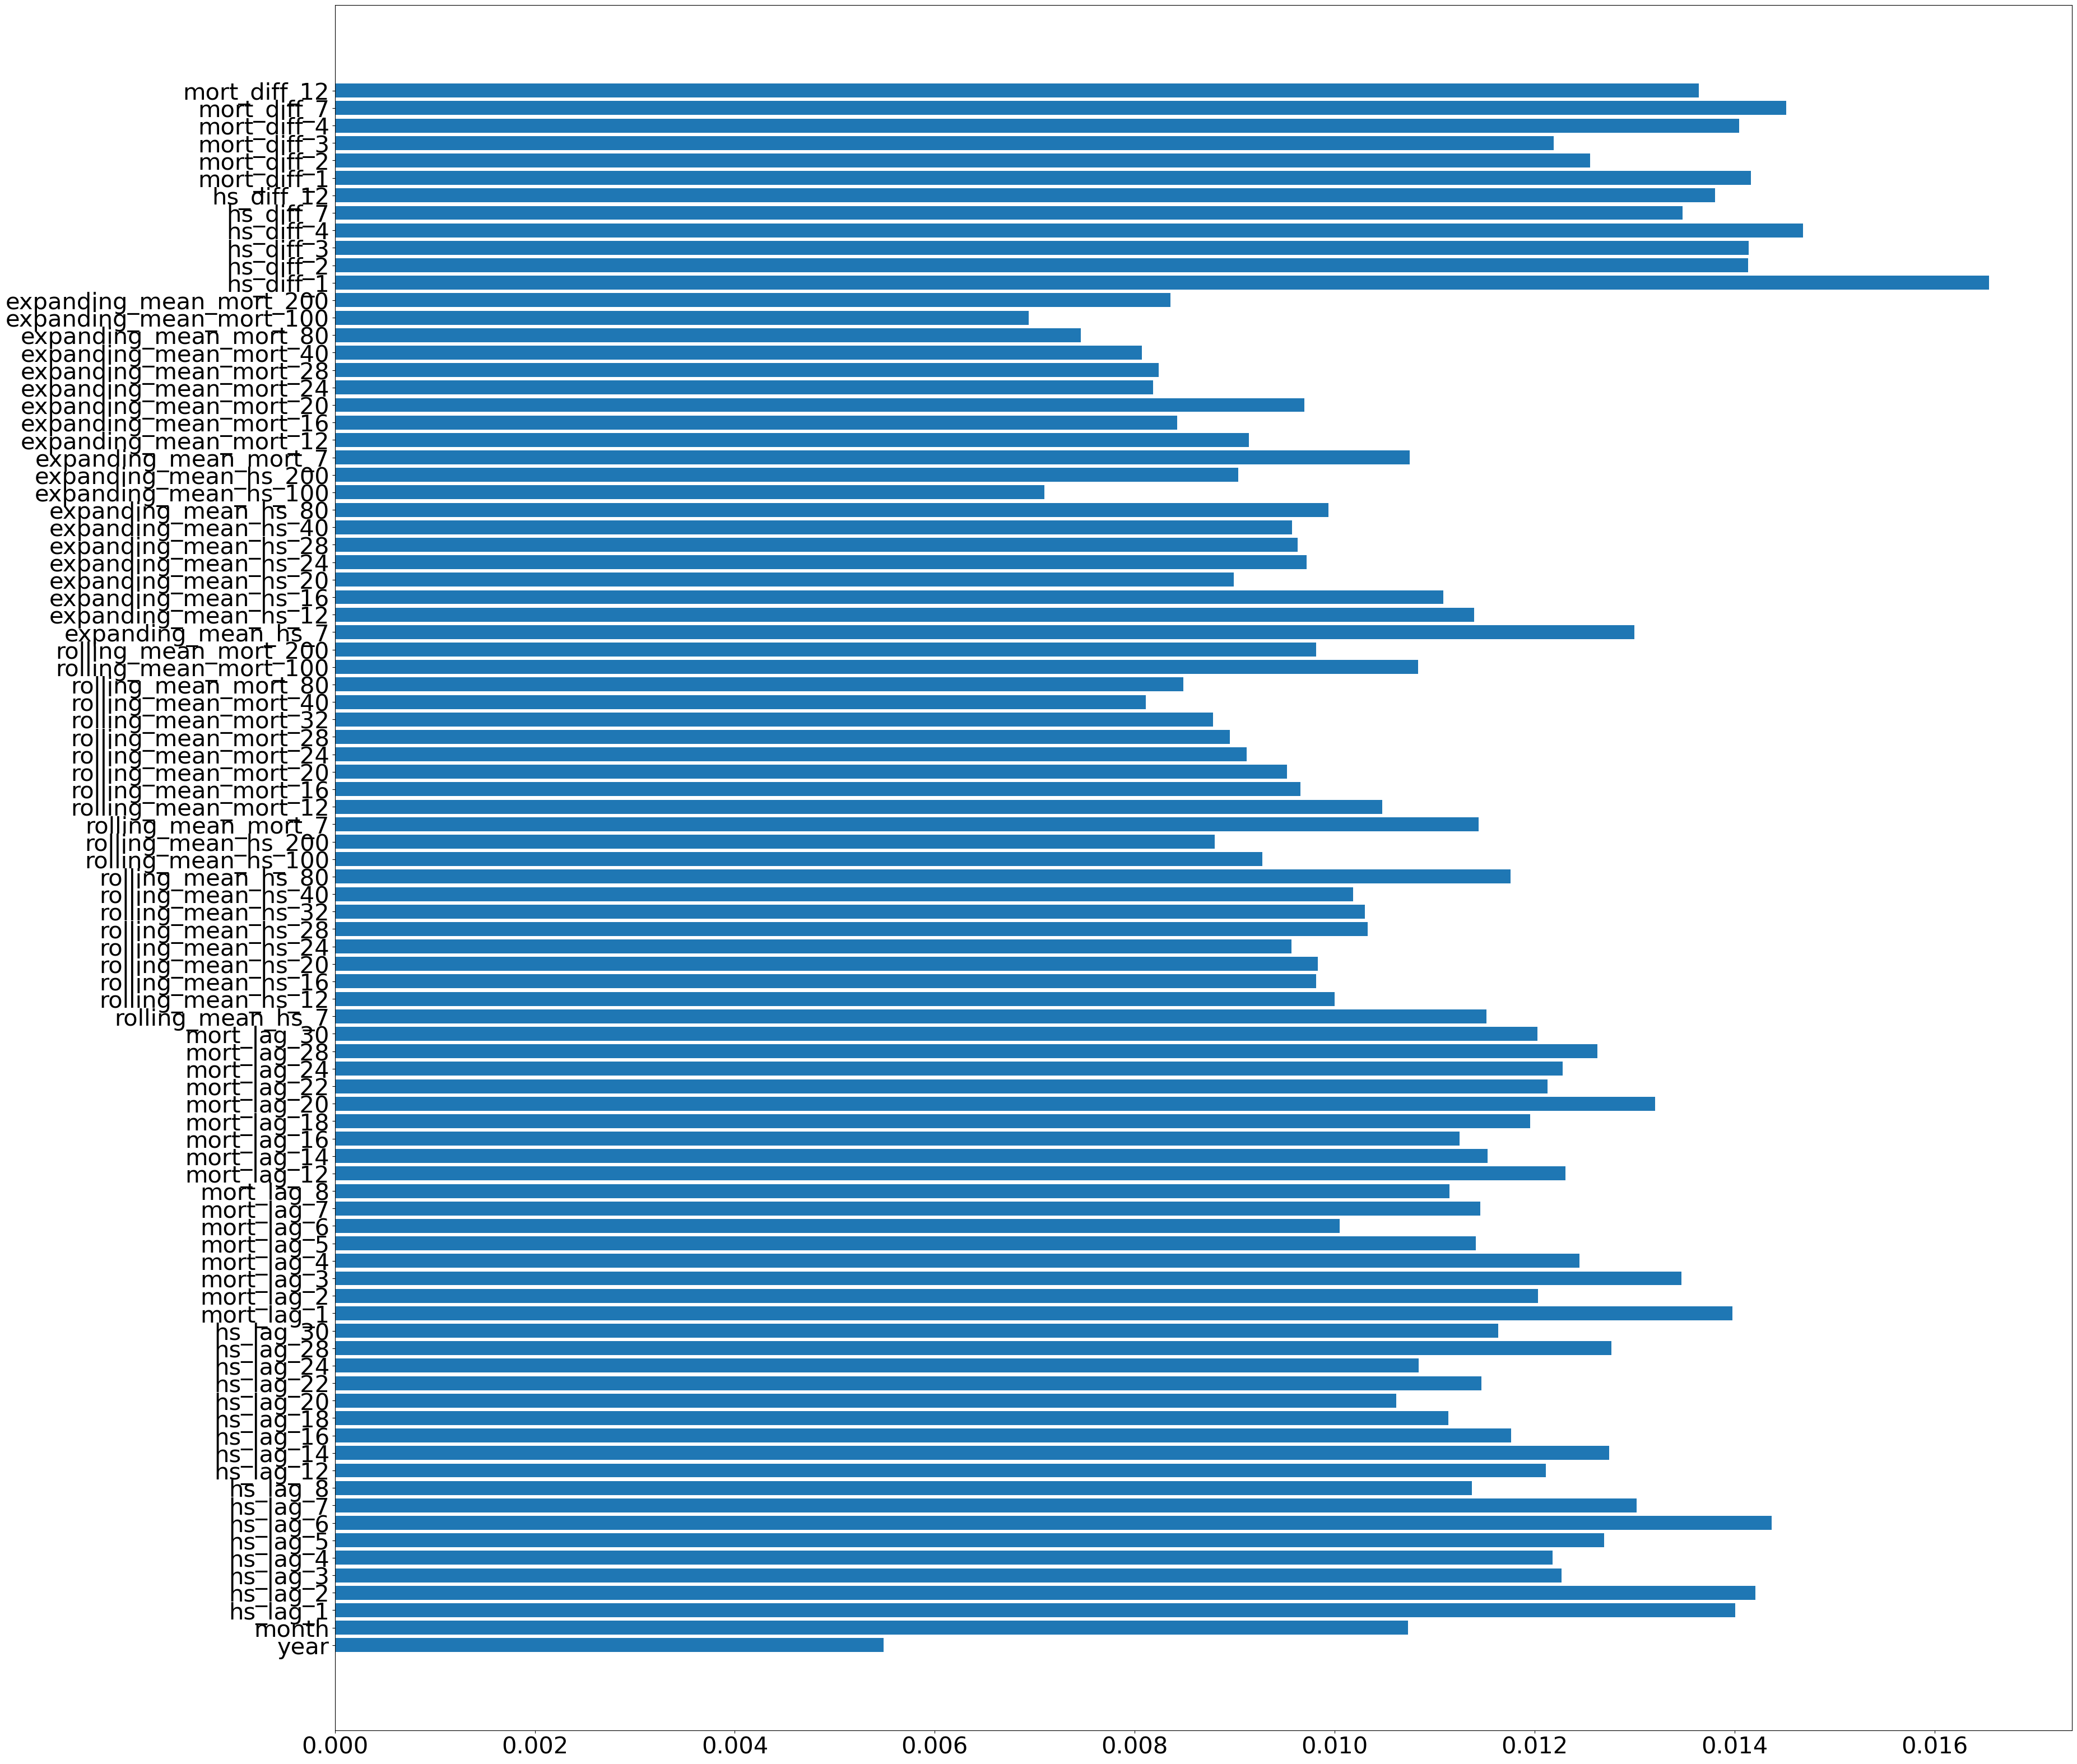

In [66]:
importances_df = pd.DataFrame({"feature_names" : model_rf_mort.feature_names_in_, 
                               "importances" : model_rf_mort.feature_importances_})
                             
# Plotting bar chart, g is from graph
plt.figure(figsize=(40,40))
plt.rcParams["font.size"]="30"
plt.barh(importances_df["feature_names"], 
         importances_df["importances"])

# XGB classifier

In [68]:
#Splitting data into x,y
y =df["hs"]
X =df.drop(["Date","hs","mort"],axis=1)

In [69]:
train_size = int(len(X)*0.8)
test_size_x = len(X) - train_size
train_data_x = X[:train_size]
test_data_x =  X[train_size:]
train_data_x

year  month  hs_lag_1  hs_lag_2  hs_lag_3  hs_lag_4  hs_lag_5  hs_lag_6  \
0    1971      4       0.0       0.0       0.0       0.0       0.0       0.0   
1    1971      5    1986.0       0.0       0.0       0.0       0.0       0.0   
2    1971      6    2049.0    1986.0       0.0       0.0       0.0       0.0   
3    1971      7    2026.0    2049.0    1986.0       0.0       0.0       0.0   
4    1971      8    2083.0    2026.0    2049.0    1986.0       0.0       0.0   
..    ...    ...       ...       ...       ...       ...       ...       ...   
388  2003      8    1897.0    1867.0    1751.0    1643.0    1726.0    1629.0   
389  2003      9    1833.0    1897.0    1867.0    1751.0    1643.0    1726.0   
390  2003     10    1939.0    1833.0    1897.0    1867.0    1751.0    1643.0   
391  2003     11    1967.0    1939.0    1833.0    1897.0    1867.0    1751.0   
392  2003     12    2083.0    1967.0    1939.0    1833.0    1897.0    1867.0   

     hs_lag_7  hs_lag_8  ...  hs_diff_3  hs_diff_4  hs_diff_7  hs_diff_12  \
0         0.0       0.0  ...        0.0        0.0        0.0         0.0   
1         0.0       0.0  ...        0.0        0.0        0.0         0.0   
2         0.0       0.0  ...        0.0        0.0        0.0         0.0   
3         0.0       0.0  ...       97.0        0.0        0.0         0.0   
4         0.0       0.0  ...      109.0      172.0        0.0         0.0   
..        ...       ...  ...        ...        ...        ...         ...   
388    1853.0    1788.0  ...       82.0      190.0      -20.0       200.0   
389    1629.0    1853.0  ...       72.0      188.0      310.0       135.0   
390    1726.0    1629.0  ...       70.0      100.0      241.0       319.0   
391    1643.0    1726.0  ...      250.0      186.0      440.0       330.0   
392    1751.0    1643.0  ...      118.0      224.0      306.0       269.0   

     mort_diff_1  mort_diff_2  mort_diff_3  mort_diff_4  mort_diff_7  \
0           0.00         0.00         0.00         0.00         0.00   
1           0.12         0.00         0.00         0.00         0.00   
2           0.10         0.22         0.00         0.00         0.00   
3           0.07         0.17         0.29         0.00         0.00   
4           0.10         0.17         0.27         0.39         0.00   
..           ...          ...          ...          ...          ...   
388         0.63         1.03         0.78         0.45         0.34   
389        -0.11         0.52         0.92         0.67         0.31   
390        -0.20        -0.31         0.32         0.72         0.20   
391        -0.02        -0.22        -0.33         0.30         0.12   
392        -0.05        -0.07        -0.27        -0.38         0.40   

     mort_diff_12  
0            0.00  
1            0.00  
2            0.00  
3            0.00  
4            0.00  
..            ...  
388         -0.03  
389          0.06  
390         -0.16  
391         -0.14  
392         -0.17  

[393 rows x 90 columns]

In [70]:
train_size = int(len(y)*0.8)
test_size_y = len(y) - train_size
train_data_y = y[:train_size]
test_data_y =  y[train_size:]
train_data_y

0      1986
1      2049
2      2026
3      2083
4      2158
       ... 
388    1833
389    1939
390    1967
391    2083
392    2057
Name: hs, Length: 393, dtype: int64

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data_y = le.fit_transform(train_data_y)
test_data_y = le.fit_transform(test_data_y)
train_data_y.shape

(393,)

In [72]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(train_data_x,train_data_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [73]:
#calculate the accueacy of the classifier
y_pred = xgb_model.predict(test_data_x)
accuracy =accuracy_score(test_data_y,y_pred)
print(accuracy)

0.0


<BarContainer object of 90 artists>

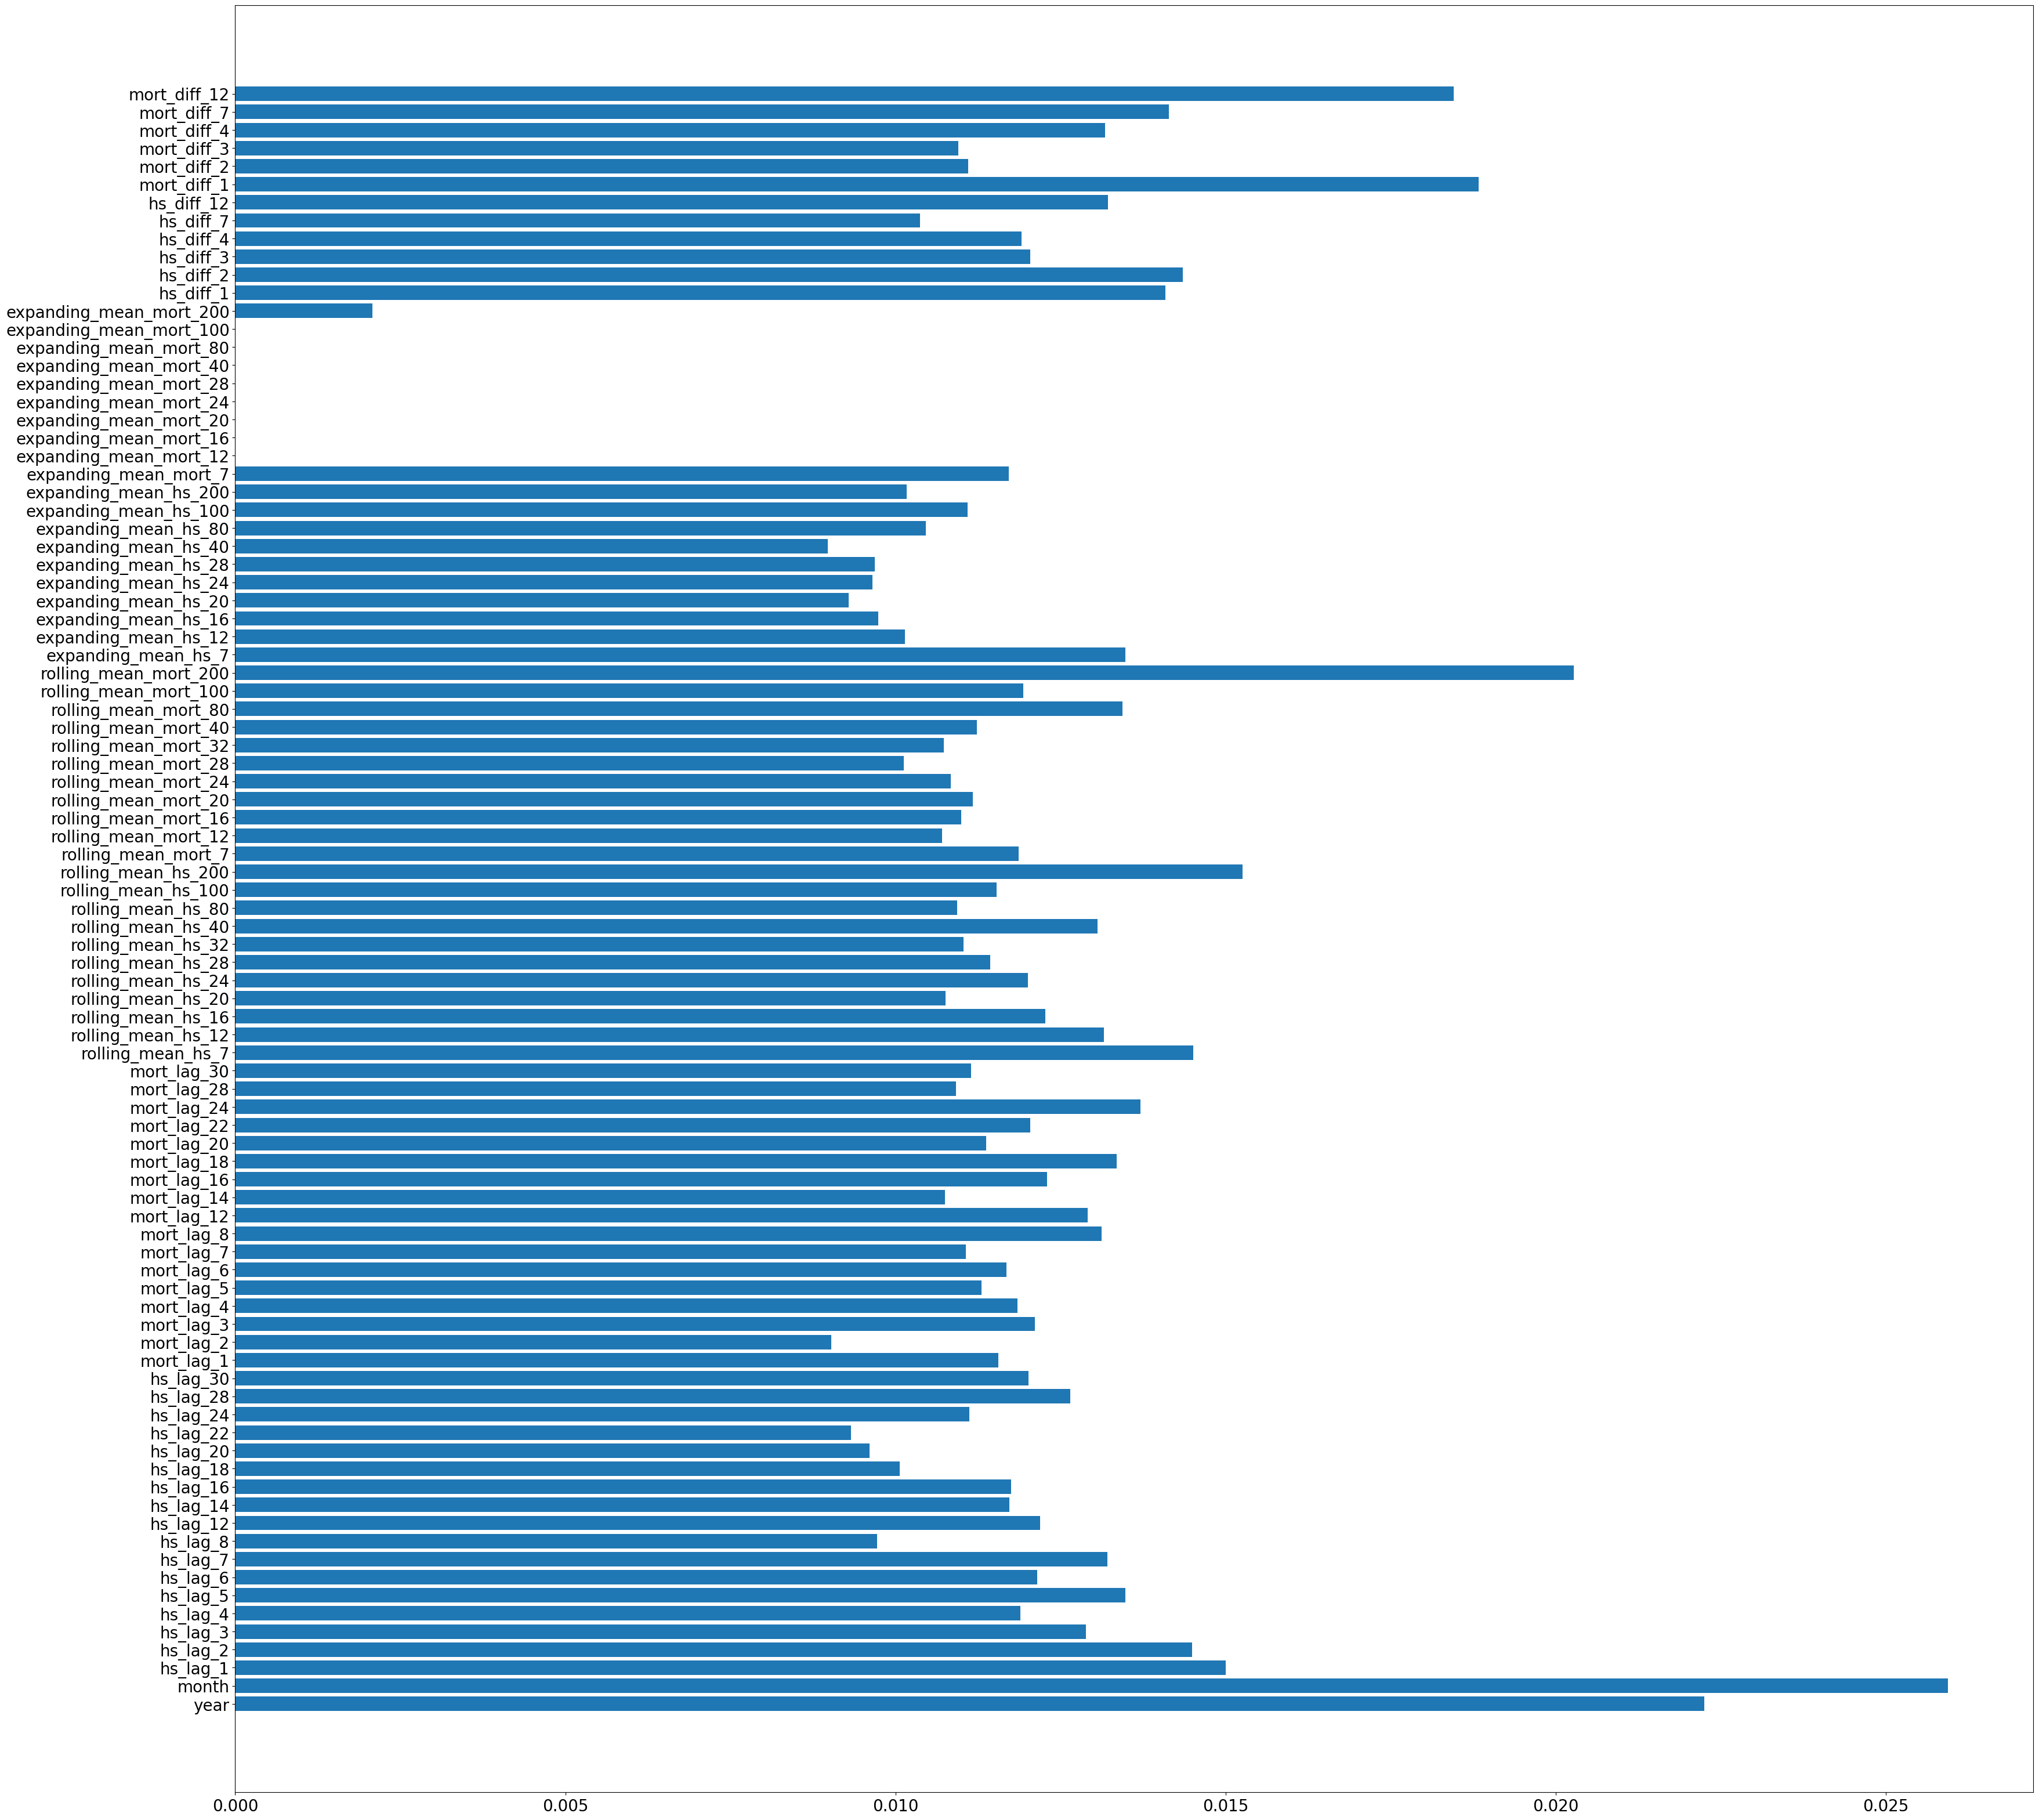

In [75]:
importances_df = pd.DataFrame({"feature_names" : xgb_model.feature_names_in_, 
                               "importances" : xgb_model.feature_importances_})
                             
# Plotting bar chart, g is from graph
plt.figure(figsize=(40,40))
plt.rcParams["font.size"]="20"
plt.barh(importances_df["feature_names"], 
         importances_df["importances"])

# XGB For mort

In [76]:
#Splitting data into x,y
y =df["mort"]
X =df.drop(["Date","hs","mort"],axis=1)

In [88]:
train_size = int(len(X)*0.8)
test_size = len(X) - train_size
train_data_x_mort = X[:train_size]
test_data_x_mort =  X[train_size:]
train_data_x_mort

year  month  hs_lag_1  hs_lag_2  hs_lag_3  hs_lag_4  hs_lag_5  hs_lag_6  \
0    1971      4       0.0       0.0       0.0       0.0       0.0       0.0   
1    1971      5    1986.0       0.0       0.0       0.0       0.0       0.0   
2    1971      6    2049.0    1986.0       0.0       0.0       0.0       0.0   
3    1971      7    2026.0    2049.0    1986.0       0.0       0.0       0.0   
4    1971      8    2083.0    2026.0    2049.0    1986.0       0.0       0.0   
..    ...    ...       ...       ...       ...       ...       ...       ...   
388  2003      8    1897.0    1867.0    1751.0    1643.0    1726.0    1629.0   
389  2003      9    1833.0    1897.0    1867.0    1751.0    1643.0    1726.0   
390  2003     10    1939.0    1833.0    1897.0    1867.0    1751.0    1643.0   
391  2003     11    1967.0    1939.0    1833.0    1897.0    1867.0    1751.0   
392  2003     12    2083.0    1967.0    1939.0    1833.0    1897.0    1867.0   

     hs_lag_7  hs_lag_8  ...  hs_diff_3  hs_diff_4  hs_diff_7  hs_diff_12  \
0         0.0       0.0  ...        0.0        0.0        0.0         0.0   
1         0.0       0.0  ...        0.0        0.0        0.0         0.0   
2         0.0       0.0  ...        0.0        0.0        0.0         0.0   
3         0.0       0.0  ...       97.0        0.0        0.0         0.0   
4         0.0       0.0  ...      109.0      172.0        0.0         0.0   
..        ...       ...  ...        ...        ...        ...         ...   
388    1853.0    1788.0  ...       82.0      190.0      -20.0       200.0   
389    1629.0    1853.0  ...       72.0      188.0      310.0       135.0   
390    1726.0    1629.0  ...       70.0      100.0      241.0       319.0   
391    1643.0    1726.0  ...      250.0      186.0      440.0       330.0   
392    1751.0    1643.0  ...      118.0      224.0      306.0       269.0   

     mort_diff_1  mort_diff_2  mort_diff_3  mort_diff_4  mort_diff_7  \
0           0.00         0.00         0.00         0.00         0.00   
1           0.12         0.00         0.00         0.00         0.00   
2           0.10         0.22         0.00         0.00         0.00   
3           0.07         0.17         0.29         0.00         0.00   
4           0.10         0.17         0.27         0.39         0.00   
..           ...          ...          ...          ...          ...   
388         0.63         1.03         0.78         0.45         0.34   
389        -0.11         0.52         0.92         0.67         0.31   
390        -0.20        -0.31         0.32         0.72         0.20   
391        -0.02        -0.22        -0.33         0.30         0.12   
392        -0.05        -0.07        -0.27        -0.38         0.40   

     mort_diff_12  
0            0.00  
1            0.00  
2            0.00  
3            0.00  
4            0.00  
..            ...  
388         -0.03  
389          0.06  
390         -0.16  
391         -0.14  
392         -0.17  

[393 rows x 90 columns]

In [89]:
train_size = int(len(y)*0.8)
test_size = len(y) - train_size
train_data_y_mort = y[:train_size]
test_data_y_mort =  y[train_size:]
train_data_y_mort

0      7.31
1      7.43
2      7.53
3      7.60
4      7.70
       ... 
388    6.26
389    6.15
390    5.95
391    5.93
392    5.88
Name: mort, Length: 393, dtype: float64

In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data_y_mort = le.fit_transform(train_data_y_mort)
train_data_y_mort.shape
test_data_y_mort = le.fit_transform(test_data_y_mort)

In [91]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(train_data_x_mort,train_data_y_mort)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [93]:
#calculate the accueacy of the classifier
y_pred = xgb_model.predict(test_data_x_hstart)
accuracy =accuracy_score(test_data_y_hstart,y_pred)
print(accuracy)

0.010101010101010102


<BarContainer object of 90 artists>

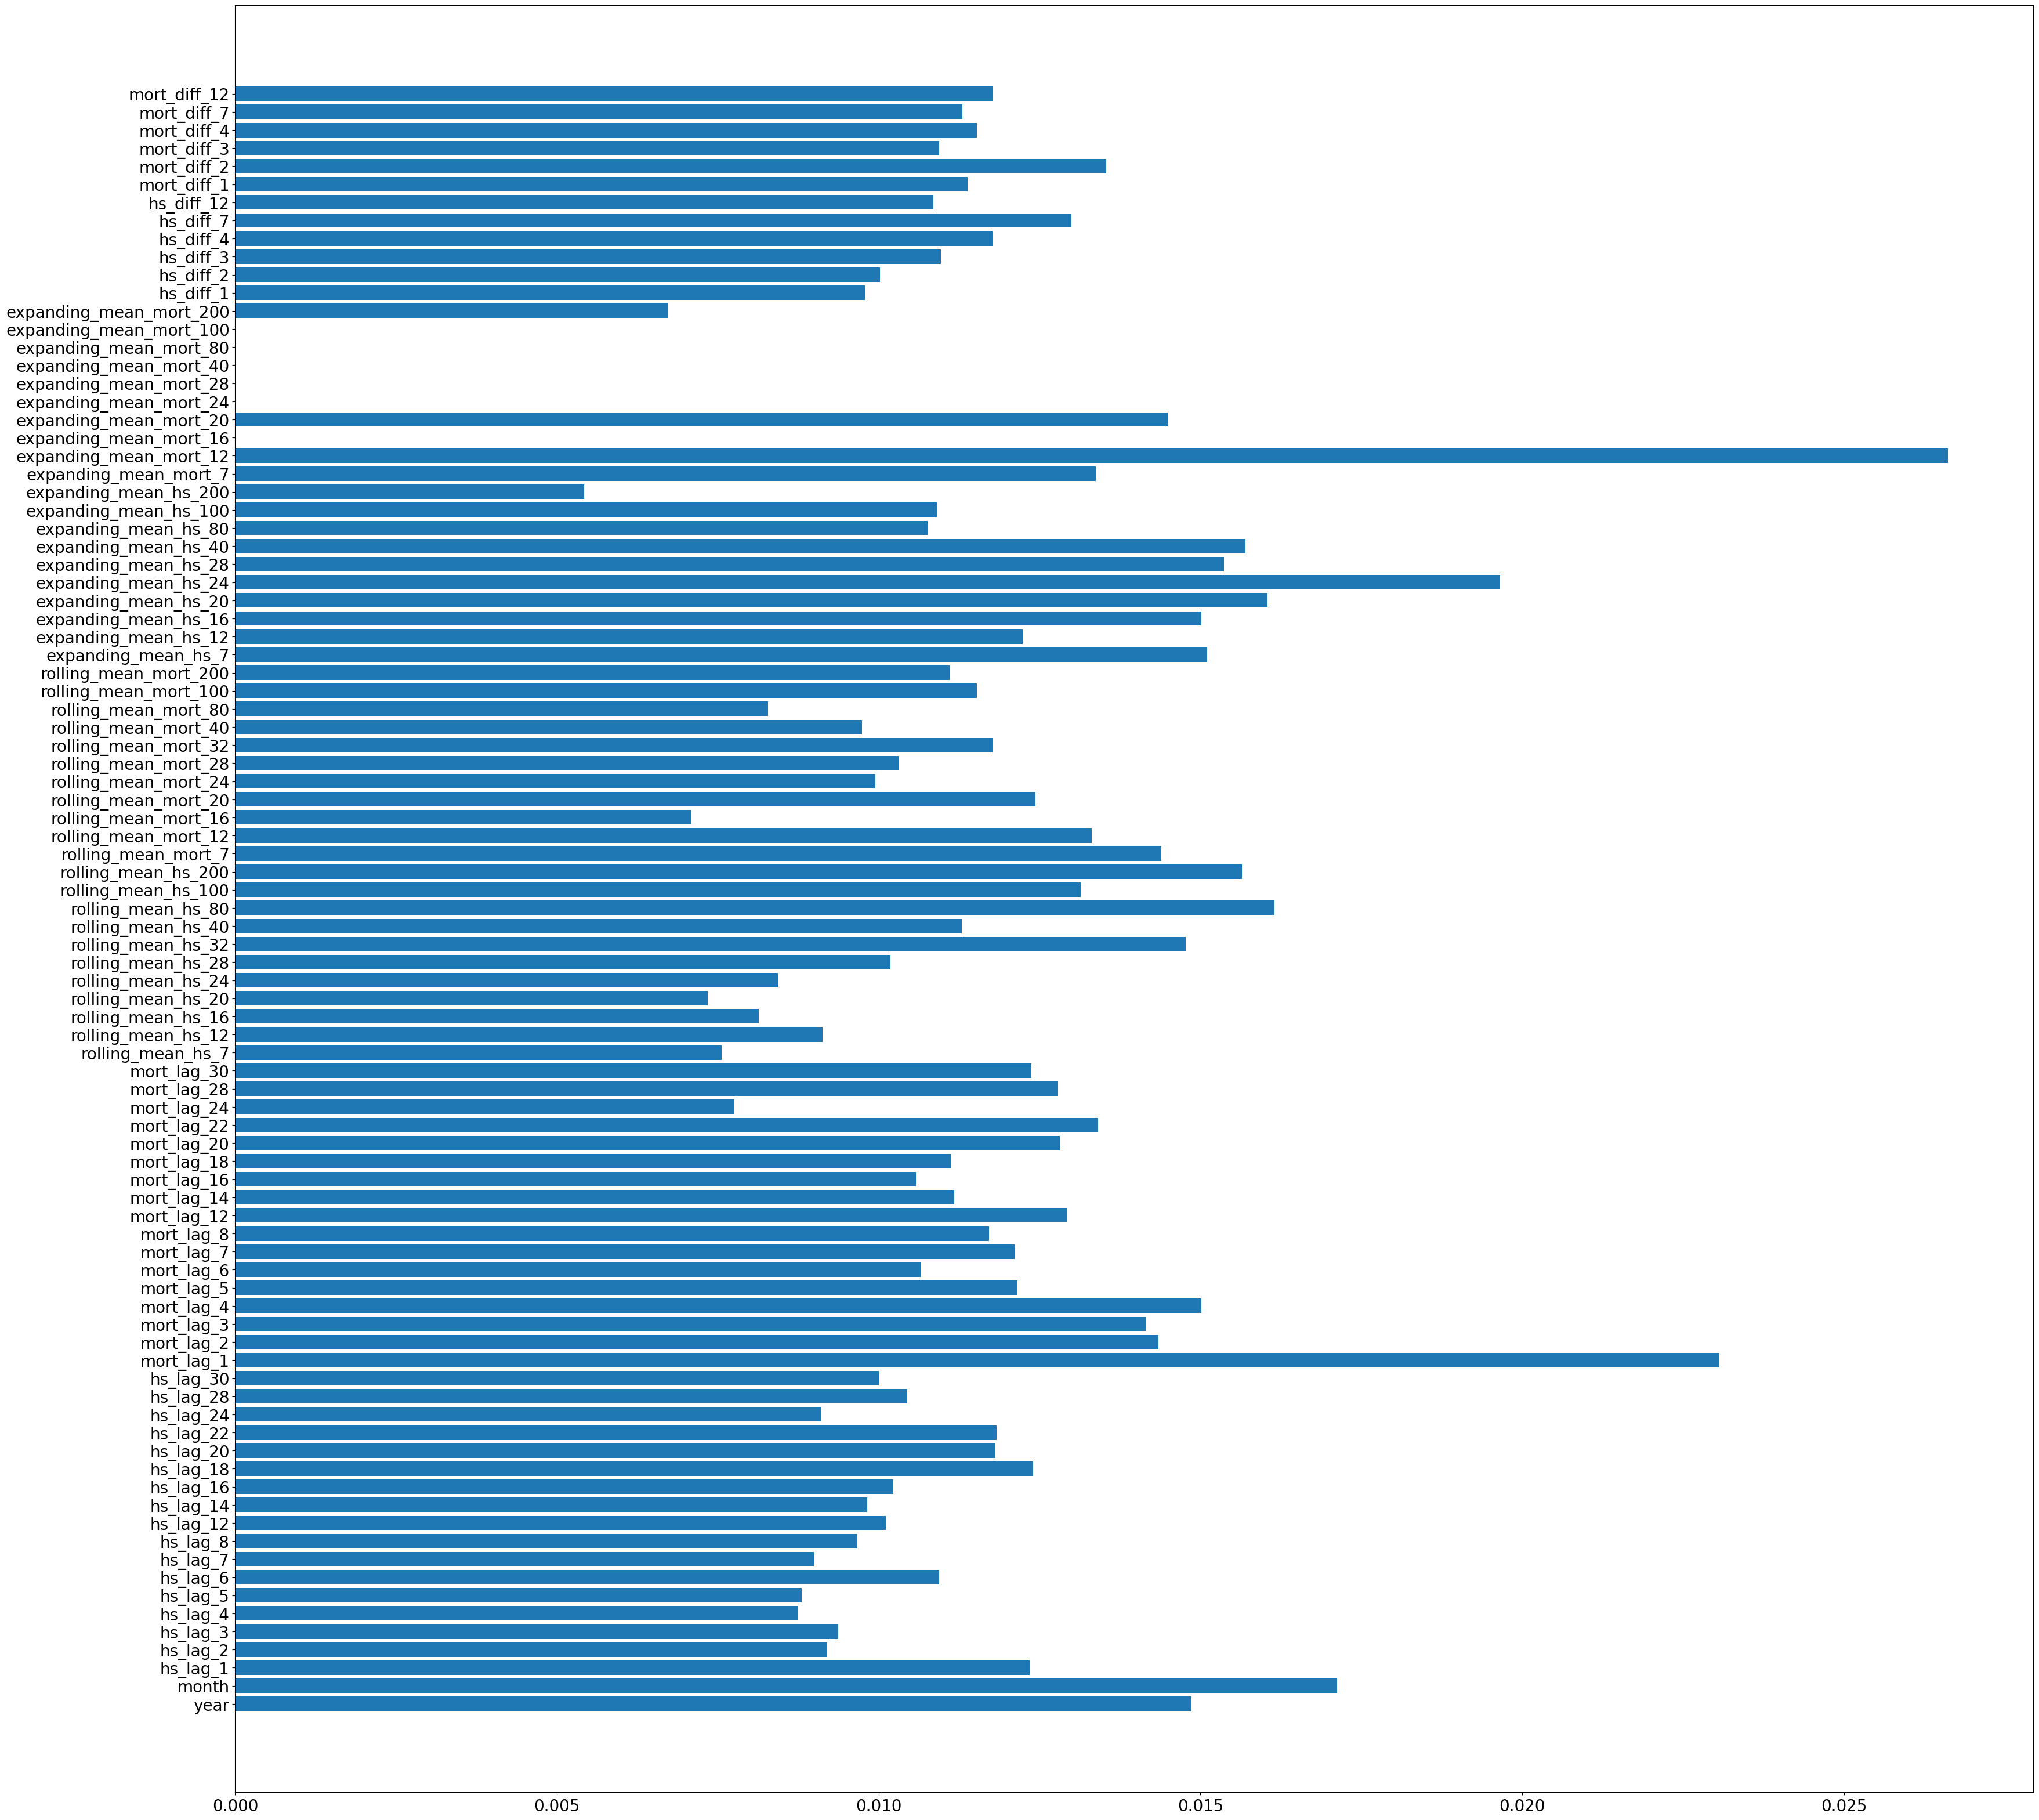

In [95]:
importances_df = pd.DataFrame({"feature_names" : xgb_model.feature_names_in_, 
                               "importances" : xgb_model.feature_importances_})
                             
# Plotting bar chart, g is from graph
plt.figure(figsize=(40,40))
plt.rcParams["font.size"]="20"
plt.barh(importances_df["feature_names"], 
         importances_df["importances"])

# Decision Tree classifier

In [96]:
#Splitting data into x,y
y =df["hs"]
X =df.drop(["Date","hs","mort"],axis=1)

In [97]:
train_size = int(len(X)*0.8)
test_size_x = len(X) - train_size
train_data_x = X[:train_size]
test_data_x =  X[train_size:]
train_data_x

year  month  hs_lag_1  hs_lag_2  hs_lag_3  hs_lag_4  hs_lag_5  hs_lag_6  \
0    1971      4       0.0       0.0       0.0       0.0       0.0       0.0   
1    1971      5    1986.0       0.0       0.0       0.0       0.0       0.0   
2    1971      6    2049.0    1986.0       0.0       0.0       0.0       0.0   
3    1971      7    2026.0    2049.0    1986.0       0.0       0.0       0.0   
4    1971      8    2083.0    2026.0    2049.0    1986.0       0.0       0.0   
..    ...    ...       ...       ...       ...       ...       ...       ...   
388  2003      8    1897.0    1867.0    1751.0    1643.0    1726.0    1629.0   
389  2003      9    1833.0    1897.0    1867.0    1751.0    1643.0    1726.0   
390  2003     10    1939.0    1833.0    1897.0    1867.0    1751.0    1643.0   
391  2003     11    1967.0    1939.0    1833.0    1897.0    1867.0    1751.0   
392  2003     12    2083.0    1967.0    1939.0    1833.0    1897.0    1867.0   

     hs_lag_7  hs_lag_8  ...  hs_diff_3  hs_diff_4  hs_diff_7  hs_diff_12  \
0         0.0       0.0  ...        0.0        0.0        0.0         0.0   
1         0.0       0.0  ...        0.0        0.0        0.0         0.0   
2         0.0       0.0  ...        0.0        0.0        0.0         0.0   
3         0.0       0.0  ...       97.0        0.0        0.0         0.0   
4         0.0       0.0  ...      109.0      172.0        0.0         0.0   
..        ...       ...  ...        ...        ...        ...         ...   
388    1853.0    1788.0  ...       82.0      190.0      -20.0       200.0   
389    1629.0    1853.0  ...       72.0      188.0      310.0       135.0   
390    1726.0    1629.0  ...       70.0      100.0      241.0       319.0   
391    1643.0    1726.0  ...      250.0      186.0      440.0       330.0   
392    1751.0    1643.0  ...      118.0      224.0      306.0       269.0   

     mort_diff_1  mort_diff_2  mort_diff_3  mort_diff_4  mort_diff_7  \
0           0.00         0.00         0.00         0.00         0.00   
1           0.12         0.00         0.00         0.00         0.00   
2           0.10         0.22         0.00         0.00         0.00   
3           0.07         0.17         0.29         0.00         0.00   
4           0.10         0.17         0.27         0.39         0.00   
..           ...          ...          ...          ...          ...   
388         0.63         1.03         0.78         0.45         0.34   
389        -0.11         0.52         0.92         0.67         0.31   
390        -0.20        -0.31         0.32         0.72         0.20   
391        -0.02        -0.22        -0.33         0.30         0.12   
392        -0.05        -0.07        -0.27        -0.38         0.40   

     mort_diff_12  
0            0.00  
1            0.00  
2            0.00  
3            0.00  
4            0.00  
..            ...  
388         -0.03  
389          0.06  
390         -0.16  
391         -0.14  
392         -0.17  

[393 rows x 90 columns]

In [98]:
train_size = int(len(y)*0.8)
test_size_y = len(y) - train_size
train_data_y = y[:train_size]
test_data_y =  y[train_size:]
train_data_y

0      1986
1      2049
2      2026
3      2083
4      2158
       ... 
388    1833
389    1939
390    1967
391    2083
392    2057
Name: hs, Length: 393, dtype: int64

In [99]:
des_clf = DecisionTreeClassifier()
des_clf.fit(train_data_x,train_data_y)

DecisionTreeClassifier()

In [102]:
#calculate the accueacy of the classifier
y_pred = des_clf.predict(test_data_x)
accuracy =accuracy_score(test_data_y,y_pred)
print(accuracy)

0.0


<BarContainer object of 90 artists>

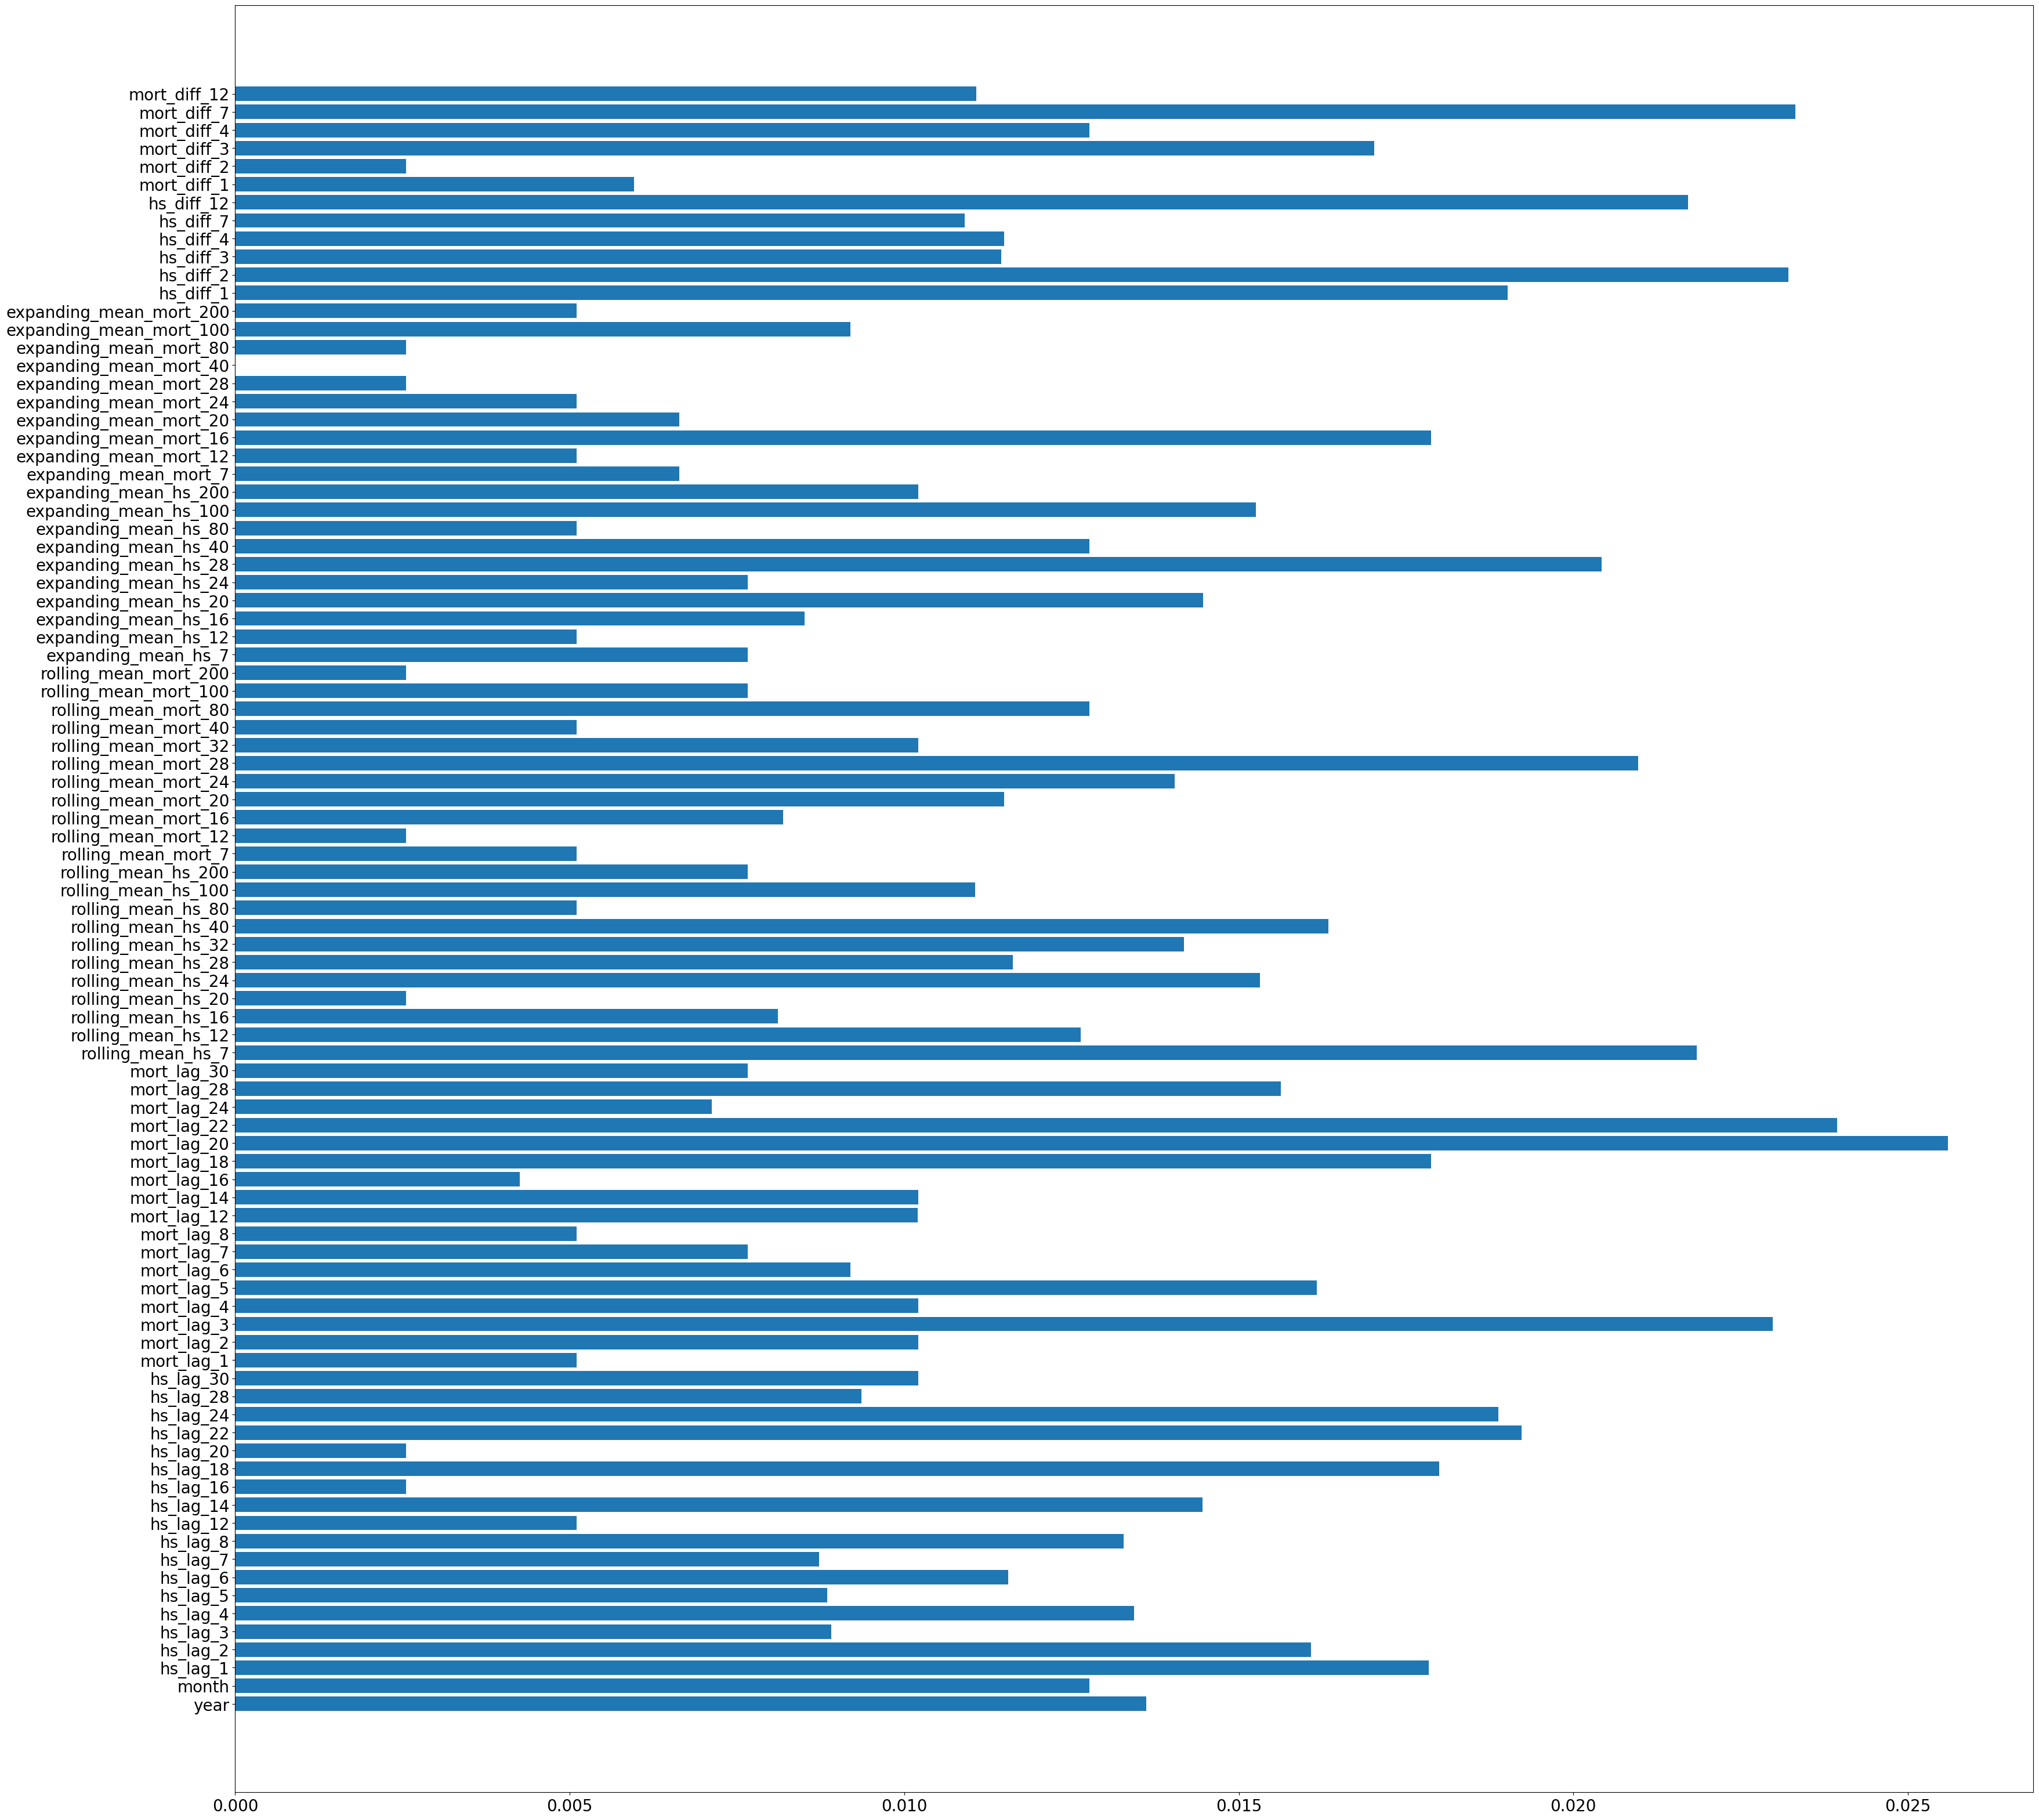

In [104]:
importances_df = pd.DataFrame({"feature_names" : des_clf.feature_names_in_, 
                               "importances" : des_clf.feature_importances_})
                             
# Plotting bar chart, g is from graph
plt.figure(figsize=(40,40))
plt.rcParams["font.size"]="20"
plt.barh(importances_df["feature_names"], 
         importances_df["importances"])

# Decision Tree mort

In [105]:
#Splitting data into x,y
y =df["mort"].astype(int)
X =df.drop(["Date","hs","mort"],axis=1)

In [106]:
train_size = int(len(X)*0.8)
test_size_x = len(X) - train_size
train_data_x_hstart = X[:train_size]
test_data_x_hstart =  X[train_size:]
train_data_x_hstart

year  month  hs_lag_1  hs_lag_2  hs_lag_3  hs_lag_4  hs_lag_5  hs_lag_6  \
0    1971      4       0.0       0.0       0.0       0.0       0.0       0.0   
1    1971      5    1986.0       0.0       0.0       0.0       0.0       0.0   
2    1971      6    2049.0    1986.0       0.0       0.0       0.0       0.0   
3    1971      7    2026.0    2049.0    1986.0       0.0       0.0       0.0   
4    1971      8    2083.0    2026.0    2049.0    1986.0       0.0       0.0   
..    ...    ...       ...       ...       ...       ...       ...       ...   
388  2003      8    1897.0    1867.0    1751.0    1643.0    1726.0    1629.0   
389  2003      9    1833.0    1897.0    1867.0    1751.0    1643.0    1726.0   
390  2003     10    1939.0    1833.0    1897.0    1867.0    1751.0    1643.0   
391  2003     11    1967.0    1939.0    1833.0    1897.0    1867.0    1751.0   
392  2003     12    2083.0    1967.0    1939.0    1833.0    1897.0    1867.0   

     hs_lag_7  hs_lag_8  ...  hs_diff_3  hs_diff_4  hs_diff_7  hs_diff_12  \
0         0.0       0.0  ...        0.0        0.0        0.0         0.0   
1         0.0       0.0  ...        0.0        0.0        0.0         0.0   
2         0.0       0.0  ...        0.0        0.0        0.0         0.0   
3         0.0       0.0  ...       97.0        0.0        0.0         0.0   
4         0.0       0.0  ...      109.0      172.0        0.0         0.0   
..        ...       ...  ...        ...        ...        ...         ...   
388    1853.0    1788.0  ...       82.0      190.0      -20.0       200.0   
389    1629.0    1853.0  ...       72.0      188.0      310.0       135.0   
390    1726.0    1629.0  ...       70.0      100.0      241.0       319.0   
391    1643.0    1726.0  ...      250.0      186.0      440.0       330.0   
392    1751.0    1643.0  ...      118.0      224.0      306.0       269.0   

     mort_diff_1  mort_diff_2  mort_diff_3  mort_diff_4  mort_diff_7  \
0           0.00         0.00         0.00         0.00         0.00   
1           0.12         0.00         0.00         0.00         0.00   
2           0.10         0.22         0.00         0.00         0.00   
3           0.07         0.17         0.29         0.00         0.00   
4           0.10         0.17         0.27         0.39         0.00   
..           ...          ...          ...          ...          ...   
388         0.63         1.03         0.78         0.45         0.34   
389        -0.11         0.52         0.92         0.67         0.31   
390        -0.20        -0.31         0.32         0.72         0.20   
391        -0.02        -0.22        -0.33         0.30         0.12   
392        -0.05        -0.07        -0.27        -0.38         0.40   

     mort_diff_12  
0            0.00  
1            0.00  
2            0.00  
3            0.00  
4            0.00  
..            ...  
388         -0.03  
389          0.06  
390         -0.16  
391         -0.14  
392         -0.17  

[393 rows x 90 columns]

In [107]:
train_size = int(len(y)*0.8)
test_size_y = len(y) - train_size
train_data_y_hstart = y[:train_size]
test_data_y_hstart =  y[train_size:]
train_data_y_hstart

0      7
1      7
2      7
3      7
4      7
      ..
388    6
389    6
390    5
391    5
392    5
Name: mort, Length: 393, dtype: int32

In [108]:
des_clf = DecisionTreeClassifier()
des_clf.fit(train_data_x_hstart,train_data_y_hstart)

DecisionTreeClassifier()

In [109]:
#calculate the accueacy of the classifier
y_pred = des_clf.predict(test_data_x_hstart)
accuracy =accuracy_score(test_data_y_hstart,y_pred)
print(accuracy)

0.25252525252525254


<BarContainer object of 90 artists>

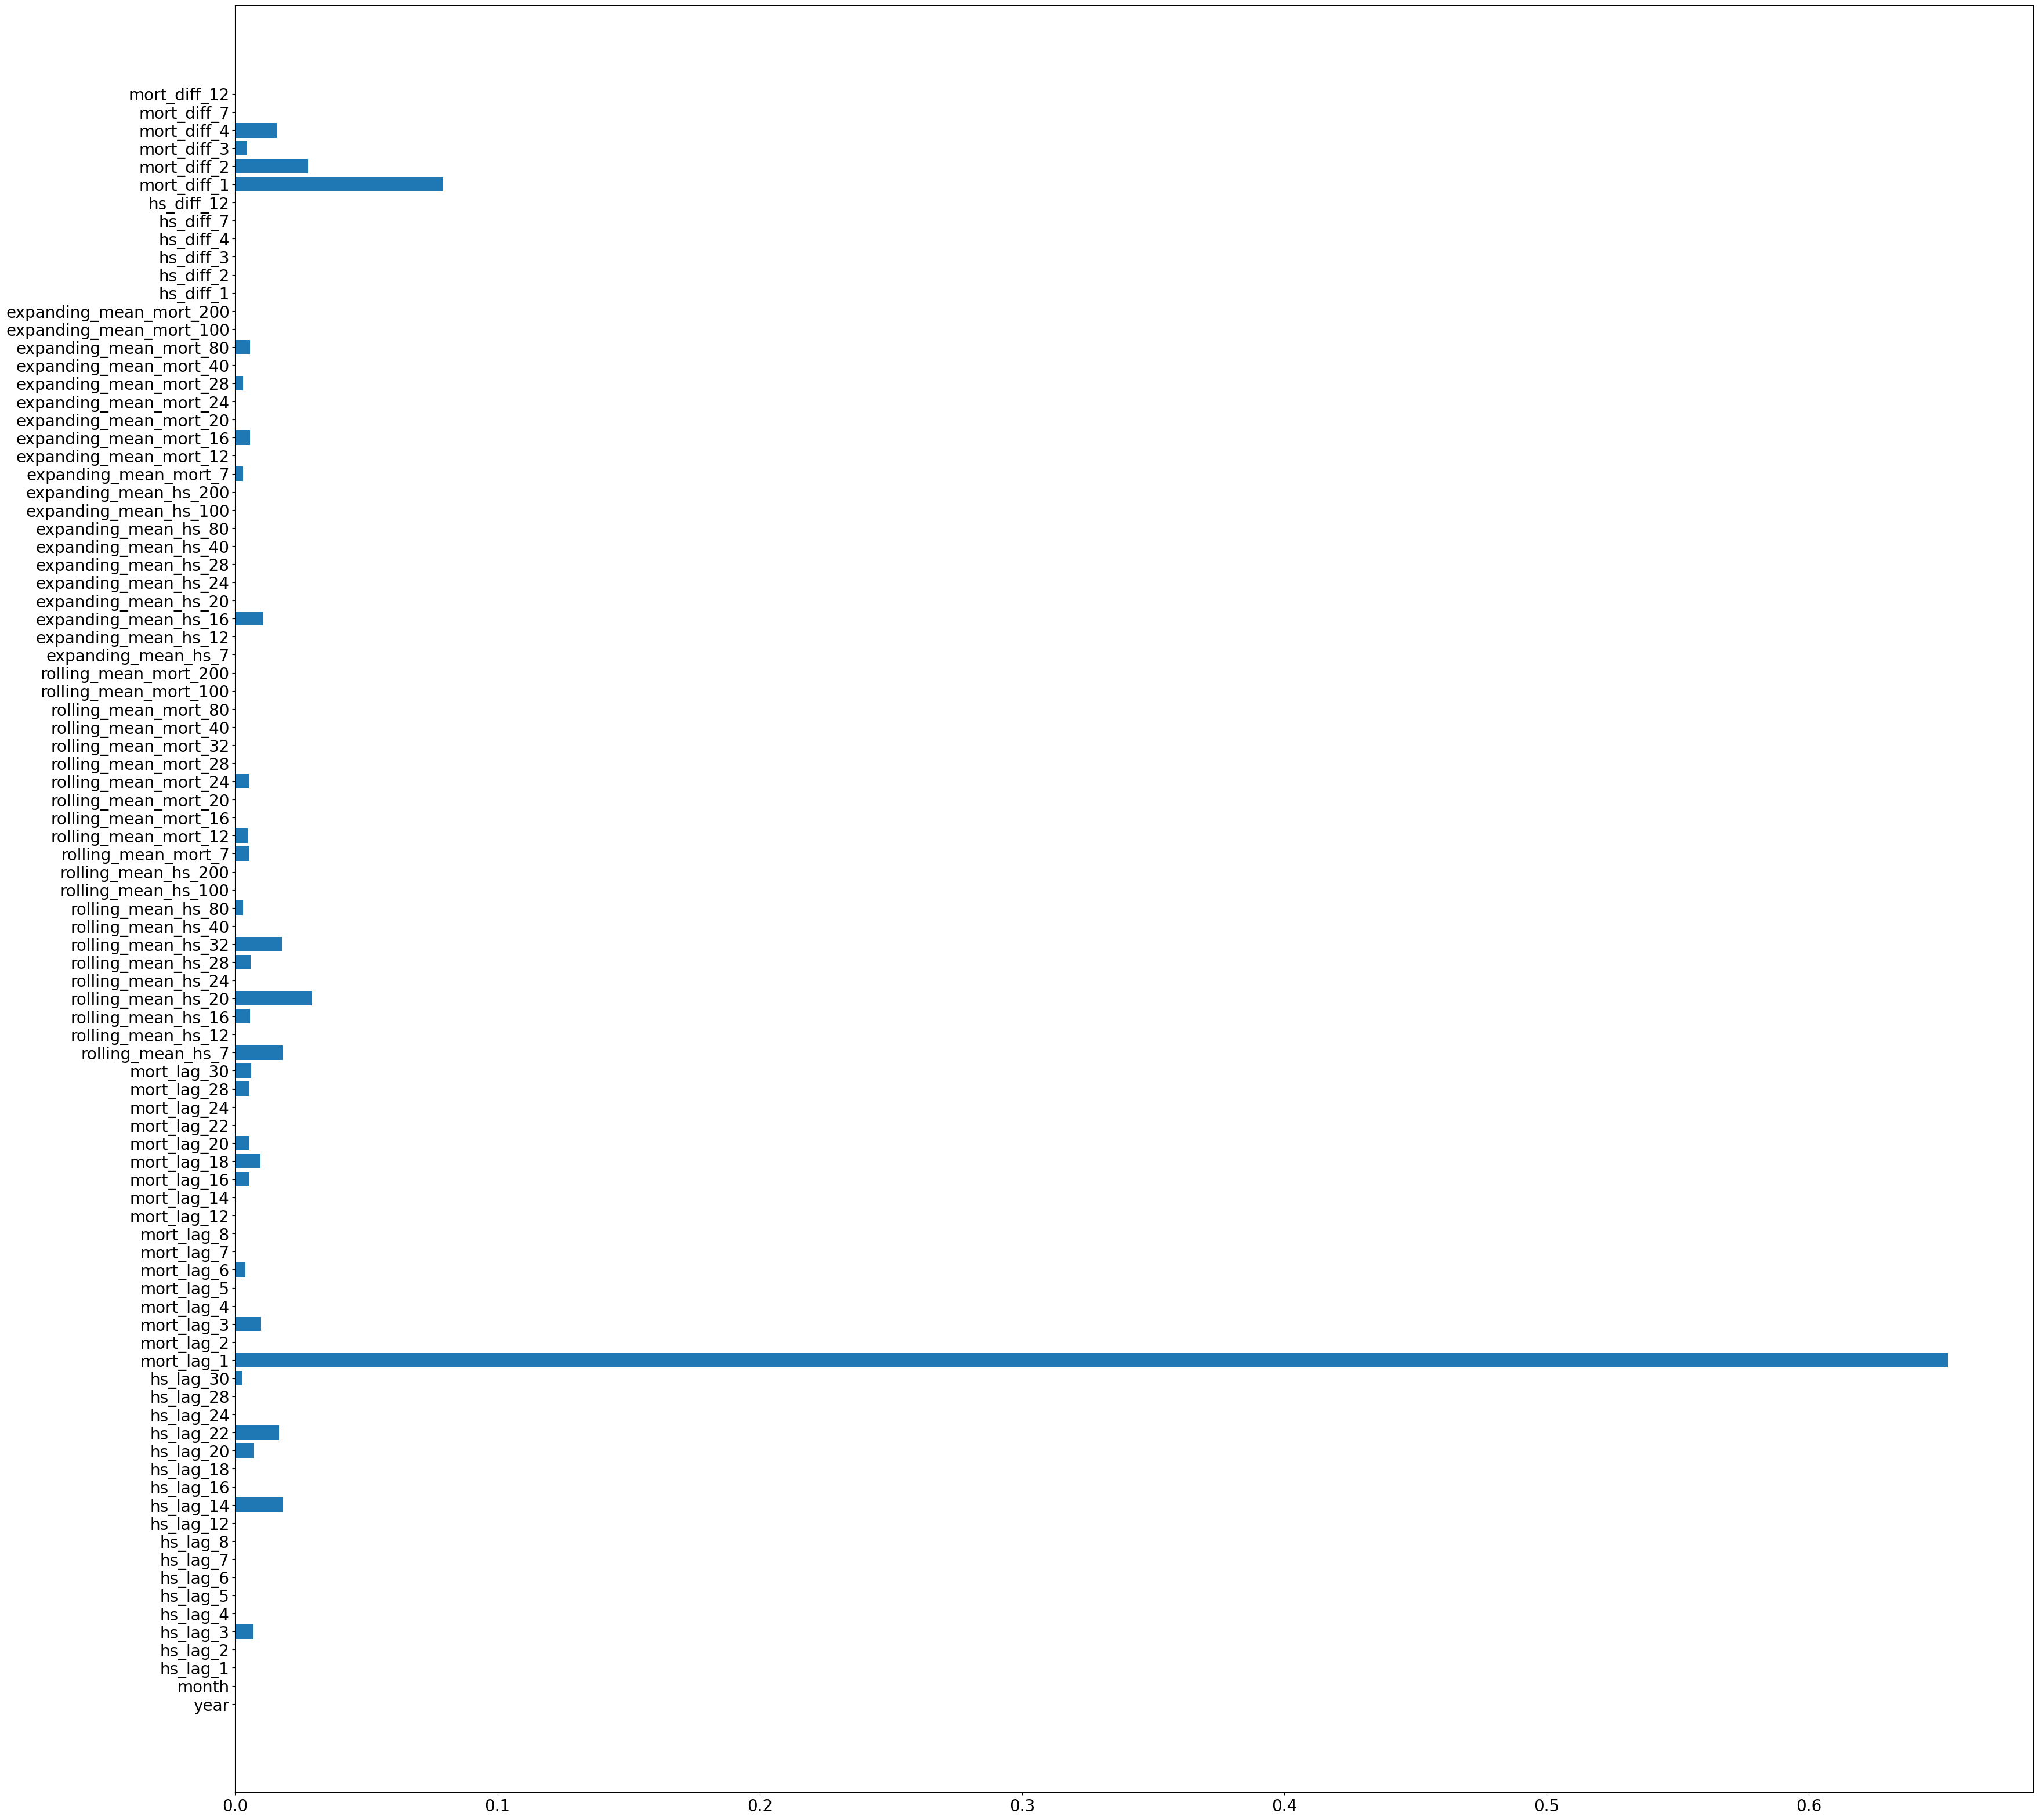

In [111]:
importances_df = pd.DataFrame({"feature_names" : des_clf.feature_names_in_, 
                               "importances" : des_clf.feature_importances_})
                             
# Plotting bar chart, g is from graph
plt.figure(figsize=(40,40))
plt.rcParams["font.size"]="20"
plt.barh(importances_df["feature_names"], 
         importances_df["importances"])

In [112]:
#Random forest regressor
data_set_y  =df["hs"]
data_set_x = df[['hs_lag_1','hs_lag_6','mort_lag_14','hs_diff_1','hs_diff_2','mort_diff_4']]


In [113]:
train_size = int(len(data_set_x)*0.8)
test_size_x = len(data_set_x) - train_size
train_data_x = data_set_x[:train_size]
test_data_x =  data_set_x[train_size:]
train_data_x

hs_lag_1  hs_lag_6  mort_lag_14  hs_diff_1  hs_diff_2  mort_diff_4
0         0.0       0.0         0.00        0.0        0.0         0.00
1      1986.0       0.0         0.00       63.0        0.0         0.00
2      2049.0       0.0         0.00      -23.0       40.0         0.00
3      2026.0       0.0         0.00       57.0       34.0         0.00
4      2083.0       0.0         0.00       75.0      132.0         0.39
..        ...       ...          ...        ...        ...          ...
388    1897.0    1629.0         6.65      -64.0      -34.0         0.45
389    1833.0    1726.0         6.49      106.0       42.0         0.67
390    1939.0    1643.0         6.29       28.0      134.0         0.72
391    1967.0    1751.0         6.09      116.0      144.0         0.30
392    2083.0    1867.0         6.11      -26.0       90.0        -0.38

[393 rows x 6 columns]

In [114]:
train_size = int(len(data_set_y)*0.8)
test_size_y = len(data_set_y) - train_size
train_data_y = data_set_y[:train_size]
test_data_y =  data_set_y[train_size:]

In [115]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators=100,random_state=0)

# fit the regressor with x and y data
regressor.fit(train_data_x, train_data_y)


RandomForestRegressor(random_state=0)

In [116]:
y_pred = regressor.predict(test_data_x)

In [117]:
#Calculate RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data_y,y_pred)

rmse = np.sqrt(mse)
rmse

215.0056718302843

In [118]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()

In [119]:
linear_regression_model.fit(train_data_x,train_data_y)

LinearRegression()

In [120]:
y_pred = linear_regression_model.predict(test_data_x)

In [121]:
#Calculate RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data_y,y_pred)

rmse = np.sqrt(mse)
rmse

83.90019889400232

# lstm

In [124]:
#Data set for Random Forest
data_set = df[['hs','mort','hs_lag_1','hs_lag_2',
               
               'mort_lag_1','mort_lag_14','hs_diff_1',
               'hs_diff_2','hs_diff_4','mort_diff_7'
               
              ]]
data_set

hs  mort  hs_lag_1  hs_lag_2  mort_lag_1  mort_lag_14  hs_diff_1  \
0    1986  7.31       0.0       0.0        0.00         0.00        0.0   
1    2049  7.43    1986.0       0.0        7.31         0.00       63.0   
2    2026  7.53    2049.0    1986.0        7.43         0.00      -23.0   
3    2083  7.60    2026.0    2049.0        7.53         0.00       57.0   
4    2158  7.70    2083.0    2026.0        7.60         0.00       75.0   
..    ...   ...       ...       ...         ...          ...        ...   
487   702  3.99     628.0     646.0        4.07         4.35       74.0   
488   681  3.96     702.0     628.0        3.99         4.23      -21.0   
489   714  3.92     681.0     702.0        3.96         4.30       33.0   
490   694  3.89     714.0     681.0        3.92         4.71      -20.0   
491   654  3.95     694.0     714.0        3.89         4.76      -40.0   

     hs_diff_2  hs_diff_4  mort_diff_7  
0          0.0        0.0         0.00  
1          0.0        0.0         0.00  
2         40.0        0.0         0.00  
3         34.0        0.0         0.00  
4        132.0      172.0         0.00  
..         ...        ...          ...  
487       56.0       87.0        -0.85  
488       53.0       96.0        -0.68  
489       12.0       68.0        -0.59  
490       13.0       66.0        -0.66  
491      -60.0      -48.0        -0.32  

[492 rows x 10 columns]

In [125]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataset = scaler.fit_transform(data_set)
scaled_dataset.shape

(492, 10)

In [126]:
def create_dataset(scaled_data):
    window_size = 6
    x_set =[]
    y_set =[]
    
    for i in range(window_size,len(scaled_data)):
        x_set.append(scaled_data[i-window_size:i,:])
        y_set.append(scaled_data[i,0:1])
        
    return x_set, y_set

In [127]:
#get the x data and y data 
x_set, y_set = create_dataset(scaled_dataset)
x_data = np.array(x_set)
y_data = np.array(y_set)
print(x_data.shape)
print(y_data.shape)

(486, 6, 10)
(486, 1)


In [128]:
#Split data
#x_data
train_size = int(len(x_data)*0.8)
test_size_x = len(x_data) - train_size
train_data_x = x_data[:train_size]
test_data_x =  x_data[train_size:]

print(train_data_x.shape)
print(test_data_x.shape)

#y_data
train_size = int(len(y_data)*0.8)
test_size_y = len(y_data) - train_size
train_data_y = y_data[:train_size]
test_data_y =  y_data[train_size:]
print(train_data_y.shape)
print(test_data_y.shape)

(388, 6, 10)
(98, 6, 10)
(388, 1)
(98, 1)


In [129]:
train_data_x.shape[1]
train_data_x.shape[2]

10

In [130]:
model = Sequential()

model.add(LSTM(units = 512, return_sequences = True, input_shape=(train_data_x.shape[1], train_data_x.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 256, return_sequences = True))
model.add(Dropout(0.2))

#model.add(LSTM(units = 256, return_sequences = True))
#model.add(Dropout(0.2))

model.add(LSTM(units = 256))
model.add(Dropout(0.2))

model.add(Dense(units = 1))


model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [524]:
model = Sequential()

model.add(LSTM(units = 1024, return_sequences = True, input_shape=(train_data_x.shape[1], train_data_x.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 512, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 256, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 256))
model.add(Dropout(0.2))

model.add(Dense(units = 1))


model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [131]:
#model fit
history = model.fit(train_data_x, train_data_y, epochs = 200, batch_size=80)

Epoch 1/200
5/5 [==============================] - 6s 136ms/step - loss: 0.1376
Epoch 2/200
5/5 [==============================] - 1s 125ms/step - loss: 0.0629
Epoch 3/200
5/5 [==============================] - 1s 124ms/step - loss: 0.0254
Epoch 4/200
5/5 [==============================] - 1s 150ms/step - loss: 0.0212
Epoch 5/200
5/5 [==============================] - 1s 166ms/step - loss: 0.0168
Epoch 6/200
5/5 [==============================] - 1s 156ms/step - loss: 0.0135
Epoch 7/200
5/5 [==============================] - 1s 156ms/step - loss: 0.0127
Epoch 8/200
5/5 [==============================] - 1s 155ms/step - loss: 0.0098
Epoch 9/200
5/5 [==============================] - 1s 155ms/step - loss: 0.0084
Epoch 10/200
5/5 [==============================] - 1s 161ms/step - loss: 0.0073
Epoch 11/200
5/5 [==============================] - 1s 156ms/step - loss: 0.0073
Epoch 12/200
5/5 [==============================] - 1s 156ms/step - loss: 0.0069
Epoch 13/200
5/5 [===================

In [132]:
#Get predictions
y_predicted = model.predict(test_data_x)

4/4 [==============================] - 1s 27ms/step


In [134]:
data = scaled_dataset[:98,:]
y_pred_act = np.concatenate((y_predicted,data[:98,1:]),axis=1)
y_test_act = np.concatenate((test_data_y,data[:98,1:]),axis=1)

In [135]:
#Calculate RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data_y, y_predicted)

rmse = np.sqrt(mse)
rmse

0.04769899945434241

In [136]:
Y_tested = scaler.inverse_transform(y_test_act)
Y_predicted = scaler.inverse_transform(y_pred_act)

Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
Y_tested.shape

(98, 1)

In [137]:
#Calculate RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested,Y_predicted)

rmse = np.sqrt(mse)
rmse

96.1611828999543

# Model_XGB_Result

In [293]:
#Data set for XGB
data_set_XGB = df[['hsold','hstart','hsold_lag_1','hsold_lag_7',
                  'rolling_mean_hsold_12','expanding_mean_hsold_80','expanding_mean_hstart_40','expanding_mean_hstart_80',
                   'expanding_mean_hsold_16'
                  ]]
data_set_XGB

hsold  hstart  hsold_lag_1  hsold_lag_7  rolling_mean_hsold_12  \
0       42    79.0          0.0          0.0               0.000000   
1       35    89.6         42.0          0.0               0.000000   
2       44   124.8         35.0          0.0               0.000000   
3       52   164.2         44.0          0.0               0.000000   
4       58   172.7         52.0          0.0               0.000000   
..     ...     ...          ...          ...                    ...   
590     34    58.0         30.0         25.0              26.750000   
591     34    66.8         34.0         24.0              27.083333   
592     35    67.8         34.0         25.0              27.666667   
593     34    74.7         35.0         23.0              28.166667   
594     34    71.7         34.0         24.0              28.750000   

     expanding_mean_hsold_80  expanding_mean_hstart_40  \
0                   0.000000                  0.000000   
1                   0.000000                  0.000000   
2                   0.000000                  0.000000   
3                   0.000000                  0.000000   
4                   0.000000                  0.000000   
..                       ...                       ...   
590                55.746193                123.623858   
591                55.709459                123.527872   
592                55.674536                123.433895   
593                55.638047                123.351852   
594                55.601681                123.265042   

     expanding_mean_hstart_80  expanding_mean_hsold_16  
0                    0.000000                 0.000000  
1                    0.000000                 0.000000  
2                    0.000000                 0.000000  
3                    0.000000                 0.000000  
4                    0.000000                 0.000000  
..                        ...                      ...  
590                123.623858                55.746193  
591                123.527872                55.709459  
592                123.433895                55.674536  
593                123.351852                55.638047  
594                123.265042                55.601681  

[595 rows x 9 columns]

# Decision Tree

In [426]:
#Data set for XGB
data_set_Deci_tree = df[['hsold','hstart','hsold_lag_1','hsold_lag_2','hsold_lag_7','hsold_lag_30','hstart_lag_1',
                         'hstart_lag_2','hstart_lag_4','hstart_lag_5'
                         
                  
                  ]]
data_set_Deci_tree

hsold  hstart  hsold_lag_1  hsold_lag_2  hsold_lag_7  hsold_lag_30  \
0       42    79.0          0.0          0.0          0.0           0.0   
1       35    89.6         42.0          0.0          0.0           0.0   
2       44   124.8         35.0         42.0          0.0           0.0   
3       52   164.2         44.0         35.0          0.0           0.0   
4       58   172.7         52.0         44.0          0.0           0.0   
..     ...     ...          ...          ...          ...           ...   
590     34    58.0         30.0         23.0         25.0          30.0   
591     34    66.8         34.0         30.0         24.0          33.0   
592     35    67.8         34.0         34.0         25.0          26.0   
593     34    74.7         35.0         34.0         23.0          24.0   
594     34    71.7         34.0         35.0         24.0          24.0   

     hstart_lag_1  hstart_lag_2  hstart_lag_4  hstart_lag_5  
0             0.0           0.0           0.0           0.0  
1            79.0           0.0           0.0           0.0  
2            89.6          79.0           0.0           0.0  
3           124.8          89.6           0.0           0.0  
4           164.2         124.8          79.0           0.0  
..            ...           ...           ...           ...  
590          49.7          47.2          53.0          53.2  
591          58.0          49.7          42.7          53.0  
592          66.8          58.0          47.2          42.7  
593          67.8          66.8          49.7          47.2  
594          74.7          67.8          58.0          49.7  

[595 rows x 10 columns]